In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import requests
import numpy as np

In [2]:
# URL page we will scraping
base_url = "https://www.sports-reference.com/cbb/seasons/2021-school-stats.html"

In [3]:
df_hold_list = []
html = urlopen(base_url)
soup = BeautifulSoup(html,'html.parser')
headers = [th.getText() for th in soup.findAll('tr', limit=2)[1].findAll('th')]
headers = headers[1:]
rows = soup.findAll('tr')[2:]
stats = [[td.getText() for td in rows[i].findAll('td')]
            for i in range(len(rows))]
df_hold_list.append(pd.DataFrame(stats, columns = headers))
team_names = pd.concat(df_hold_list)

In [4]:
print(team_names)

                     School   G   W   L  W-L%     SRS     SOS      W   L  ...  \
0    Abilene Christian NCAA  27  23   4  .852    6.10   -8.46     13   2  ...   
1                 Air Force  25   5  20  .200  -13.04    0.17      3  17  ...   
2                     Akron  23  15   8  .652    2.79   -1.02     12   6  ...   
3               Alabama A&M  15   6   9  .400  -19.25  -15.39      4   9  ...   
4        Alabama-Birmingham  29  22   7  .759    5.84   -3.79     13   5  ...   
..                      ...  ..  ..  ..   ...     ...     ... ..  ..  ..  ...   
385            Wright State  24  18   6  .750    7.73   -6.82     16   4  ...   
386                 Wyoming  25  14  11  .560   -1.48   -2.56      5   9  ...   
387                  Xavier  21  13   8  .619   11.95    7.33      6   7  ...   
388                    Yale   0   0   0                            0   0  ...   
389        Youngstown State  27  15  12  .556   -8.94   -7.33      9  11  ...   

      FT  FTA   FT%  ORB   

In [5]:
team_names.info

<bound method DataFrame.info of                      School   G   W   L  W-L%     SRS     SOS      W   L  ...  \
0    Abilene Christian NCAA  27  23   4  .852    6.10   -8.46     13   2  ...   
1                 Air Force  25   5  20  .200  -13.04    0.17      3  17  ...   
2                     Akron  23  15   8  .652    2.79   -1.02     12   6  ...   
3               Alabama A&M  15   6   9  .400  -19.25  -15.39      4   9  ...   
4        Alabama-Birmingham  29  22   7  .759    5.84   -3.79     13   5  ...   
..                      ...  ..  ..  ..   ...     ...     ... ..  ..  ..  ...   
385            Wright State  24  18   6  .750    7.73   -6.82     16   4  ...   
386                 Wyoming  25  14  11  .560   -1.48   -2.56      5   9  ...   
387                  Xavier  21  13   8  .619   11.95    7.33      6   7  ...   
388                    Yale   0   0   0                            0   0  ...   
389        Youngstown State  27  15  12  .556   -8.94   -7.33      9  11  ...

In [6]:
team_stats = team_names[['School','Tm.','FG','FG%','FGA','3P','3PA','3P%','FT',
                        'FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF']]

In [7]:
print(team_stats)

                     School   Tm.   FG   FG%   FGA   3P  3PA   3P%   FT  FTA  \
0    Abilene Christian NCAA  2096  749  .460  1628  214  606  .353  384  571   
1                 Air Force  1468  522  .446  1170  174  527  .330  250  361   
2                     Akron  1798  628  .444  1415  217  652  .333  325  429   
3               Alabama A&M   950  347  .400   868   83  286  .290  173  276   
4        Alabama-Birmingham  2105  788  .451  1746  147  475  .309  382  549   
..                      ...   ...  ...   ...   ...  ...  ...   ...  ...  ...   
385            Wright State  1967  710  .483  1471  179  484  .370  368  508   
386                 Wyoming  1915  649  .450  1442  251  704  .357  366  509   
387                  Xavier  1571  589  .458  1285  162  498  .325  231  333   
388                    Yale                                                    
389        Youngstown State  2010  717  .429  1672  186  606  .307  390  537   

      FT%  ORB   TRB  AST  STL  BLK  TO

In [8]:
team_stats.rename(columns={'Tm.':'PTS','School':'TeamName'}, inplace=True)
print(team_stats)

                   TeamName   PTS   FG   FG%   FGA   3P  3PA   3P%   FT  FTA  \
0    Abilene Christian NCAA  2096  749  .460  1628  214  606  .353  384  571   
1                 Air Force  1468  522  .446  1170  174  527  .330  250  361   
2                     Akron  1798  628  .444  1415  217  652  .333  325  429   
3               Alabama A&M   950  347  .400   868   83  286  .290  173  276   
4        Alabama-Birmingham  2105  788  .451  1746  147  475  .309  382  549   
..                      ...   ...  ...   ...   ...  ...  ...   ...  ...  ...   
385            Wright State  1967  710  .483  1471  179  484  .370  368  508   
386                 Wyoming  1915  649  .450  1442  251  704  .357  366  509   
387                  Xavier  1571  589  .458  1285  162  498  .325  231  333   
388                    Yale                                                    
389        Youngstown State  2010  717  .429  1672  186  606  .307  390  537   

      FT%  ORB   TRB  AST  STL  BLK  TO

C:\Users\WilliamNayden\anaconda3\envs\DS7331\lib\site-packages\pandas\core\frame.py:4449: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
team_ids = pd.read_csv("Teams.csv")
print(team_ids)

     TeamID       TeamName  FirstD1Season  LastD1Season
0      1101    Abilene Chr           2014          2018
1      1102      Air Force           1985          2018
2      1103          Akron           1985          2018
3      1104        Alabama           1985          2018
4      1105    Alabama A&M           2000          2018
..      ...            ...            ...           ...
359    1460      Wright St           1988          2018
360    1461        Wyoming           1985          2018
361    1462         Xavier           1985          2018
362    1463           Yale           1985          2018
363    1464  Youngstown St           1985          2018

[364 rows x 4 columns]


In [10]:
team_ids = team_ids.drop(columns=['FirstD1Season','LastD1Season'])
print(team_ids)

     TeamID       TeamName
0      1101    Abilene Chr
1      1102      Air Force
2      1103          Akron
3      1104        Alabama
4      1105    Alabama A&M
..      ...            ...
359    1460      Wright St
360    1461        Wyoming
361    1462         Xavier
362    1463           Yale
363    1464  Youngstown St

[364 rows x 2 columns]


In [11]:
seeds = pd.read_csv("seeds.csv")
print(seeds)

          TeamName  Seed Region
0          Gonzaga     1      W
1           Baylor     1      X
2         Illinois     1      Y
3         Michigan     1      Z
4             Iowa     2      W
..             ...   ...    ...
63        Hartford    16      X
64          Drexel    16      Y
65      Norfolk St    16      W
66  Mount St Marys    16      Z
67  Texas Southern    16      Z

[68 rows x 3 columns]


In [12]:
merge = seeds.merge(team_ids,on='TeamName',how='left')
print(merge)

          TeamName  Seed Region  TeamID
0          Gonzaga     1      W  1211.0
1           Baylor     1      X  1124.0
2         Illinois     1      Y  1228.0
3         Michigan     1      Z  1276.0
4             Iowa     2      W  1234.0
..             ...   ...    ...     ...
63        Hartford    16      X  1216.0
64          Drexel    16      Y  1180.0
65      Norfolk St    16      W  1313.0
66  Mount St Marys    16      Z     NaN
67  Texas Southern    16      Z     NaN

[68 rows x 4 columns]


In [13]:
merge[merge.isna().any(axis=1)]

,TeamName,Seed,Region,TeamID
5,Ohio State,2,X,NaN
27,Uconn,7,Z,NaN
29,UNC,8,X,NaN
30,Loyola Chicago,8,Y,NaN
36,VCU,10,W,NaN
46,UC Santa Barbara,12,W,NaN
54,Eastern Washington,14,W,NaN
62,App St,16,W,NaN
66,Mount St Marys,16,Z,NaN
67,Texas Southern,16,Z,NaN


In [14]:
seeds.replace(to_replace='Ohio State',value='Ohio St',inplace=True)
seeds.replace(to_replace='Uconn',value='Connecticut',inplace=True)
seeds.replace(to_replace='UNC',value='North Carolina',inplace=True)
seeds.replace(to_replace='Loyola Chicago',value='Loyola-Chicago',inplace=True)
seeds.replace(to_replace='VCU',value='VA Commonwealth',inplace=True)
seeds.replace(to_replace='UC Santa Barbara',value='Santa Barbara',inplace=True)
seeds.replace(to_replace='Eastern Washington',value='E Washington',inplace=True)
seeds.replace(to_replace='App St',value='Appalachian St',inplace=True)
seeds.replace(to_replace='Mount St Marys',value='Mt St Mary\'s',inplace=True)
seeds.replace(to_replace='Texas Southern',value='TX Southern',inplace=True)

In [15]:
merge = seeds.merge(team_ids,on='TeamName',how='left')
id_seeds = merge
print(id_seeds)

        TeamName  Seed Region  TeamID
0        Gonzaga     1      W    1211
1         Baylor     1      X    1124
2       Illinois     1      Y    1228
3       Michigan     1      Z    1276
4           Iowa     2      W    1234
..           ...   ...    ...     ...
63      Hartford    16      X    1216
64        Drexel    16      Y    1180
65    Norfolk St    16      W    1313
66  Mt St Mary's    16      Z    1291
67   TX Southern    16      Z    1411

[68 rows x 4 columns]


In [16]:
id_seeds[id_seeds.isna().any(axis=1)]

,TeamName,Seed,Region,TeamID


In [17]:
team_stats['TeamName'] = team_stats['TeamName'].str.replace('NCAA','')
team_stats['TeamName'] = team_stats['TeamName'].str.strip()
print(team_stats['TeamName'])

0       Abilene Christian
1               Air Force
2                   Akron
3             Alabama A&M
4      Alabama-Birmingham
              ...        
385          Wright State
386               Wyoming
387                Xavier
388                  Yale
389      Youngstown State
Name: TeamName, Length: 390, dtype: object


C:\Users\WilliamNayden\anaconda3\envs\DS7331\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\WilliamNayden\anaconda3\envs\DS7331\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
total_seeds = id_seeds.merge(team_stats, on='TeamName',how='left', indicator=True)
print(total_seeds)

        TeamName  Seed Region  TeamID   PTS   FG   FG%   FGA   3P  3PA  ...  \
0        Gonzaga     1      W    1211  2395  888  .551  1612  190  520  ...   
1         Baylor     1      X    1124  2025  746  .493  1513  248  593  ...   
2       Illinois     1      Y    1228  2361  851  .499  1707  197  524  ...   
3       Michigan     1      Z    1276  1830  668  .483  1382  181  468  ...   
4           Iowa     2      W    1234  2429  863  .469  1839  283  733  ...   
..           ...   ...    ...     ...   ...  ...   ...   ...  ...  ...  ...   
63      Hartford    16      X    1216  1515  543  .434  1251  174  532  ...   
64        Drexel    16      Y    1180  1358  495  .477  1038  138  371  ...   
65    Norfolk St    16      W    1313   NaN  NaN   NaN   NaN  NaN  NaN  ...   
66  Mt St Mary's    16      Z    1291   NaN  NaN   NaN   NaN  NaN  NaN  ...   
67   TX Southern    16      Z    1411   NaN  NaN   NaN   NaN  NaN  NaN  ...   

    FTA   FT%  ORB   TRB  AST  STL  BLK  TOV   PF  

In [19]:
total_seeds[total_seeds.isna().any(axis=1)]

,TeamName,Seed,Region,TeamID,PTS,FG,FG%,FGA,3P,3PA,...,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,_merge
5,Ohio St,2,X,1326,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
14,Oklahoma St,4,Y,1329,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
15,Florida St,4,Z,1199,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
20,USC,6,W,1425,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
22,San Diego St,6,Y,1361,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
23,BYU,6,Z,1140,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
30,Loyola-Chicago,8,Y,1260,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
31,LSU,8,Z,1261,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
35,St Bonaventure,9,Z,1382,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
36,VA Commonwealth,10,W,1433,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [20]:
id_seeds.replace(to_replace='St Bonaventure',value='St. Bonaventure',inplace=True)
id_seeds.replace(to_replace='Mt St Mary\'s',value='Mount St. Mary\'s',inplace=True)
id_seeds.replace(to_replace='USC',value='Southern California',inplace=True)
id_seeds.replace(to_replace='BYU',value='Brigham Young',inplace=True)
id_seeds.replace(to_replace='Loyola-Chicago',value='Loyola (IL)',inplace=True)
id_seeds.replace(to_replace='LSU',value='Louisiana St',inplace=True)
id_seeds['TeamName'] = id_seeds['TeamName'].str.replace('St','State')

In [21]:
total_seeds = merge.merge(team_stats, on='TeamName',how='left')
print(total_seeds)

               TeamName  Seed Region  TeamID   PTS   FG   FG%   FGA   3P  3PA  \
0               Gonzaga     1      W    1211  2395  888  .551  1612  190  520   
1                Baylor     1      X    1124  2025  746  .493  1513  248  593   
2              Illinois     1      Y    1228  2361  851  .499  1707  197  524   
3              Michigan     1      Z    1276  1830  668  .483  1382  181  468   
4                  Iowa     2      W    1234  2429  863  .469  1839  283  733   
..                  ...   ...    ...     ...   ...  ...   ...   ...  ...  ...   
63             Hartford    16      X    1216  1515  543  .434  1251  174  532   
64               Drexel    16      Y    1180  1358  495  .477  1038  138  371   
65        Norfolk State    16      W    1313  1730  591  .436  1357  180  489   
66  Mount State. Mary's    16      Z    1291   NaN  NaN   NaN   NaN  NaN  NaN   
67          TX Southern    16      Z    1411   NaN  NaN   NaN   NaN  NaN  NaN   

    ...   FT  FTA   FT%  OR

In [22]:
total_seeds[total_seeds.isna().any(axis=1)]

,TeamName,Seed,Region,TeamID,PTS,FG,FG%,FGA,3P,3PA,...,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF
35,State. Bonaventure,9,Z,1382,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,VA Commonwealth,10,W,1433,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,Santa Barbara,12,W,1364,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,UNC Greensboro,13,Z,1422,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,E Washington,14,W,1186,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,Abilene Chr,14,Z,1101,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,Mount State. Mary's,16,Z,1291,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,TX Southern,16,Z,1411,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
merge.replace(to_replace='State. Bonaventure',value='St. Bonaventure',inplace=True)
merge.replace(to_replace='Mount State. Mary\'s',value='Mount St. Mary\'s',inplace=True)
merge.replace(to_replace='VA Commonwealth',value='Virginia Commonwealth',inplace=True)
merge.replace(to_replace='Santa Barbara',value='UC-Santa Barbara',inplace=True)
merge.replace(to_replace='UNC Greensboro',value='North Carolina-Greensboro',inplace=True)
merge.replace(to_replace='E Washington',value='Eastern Washington',inplace=True)
merge.replace(to_replace='Abilene Chr',value='Abilene Christian',inplace=True)
merge.replace(to_replace='TX Southern',value='Texas Southern',inplace=True)

In [24]:
total_seeds = merge.merge(team_stats, on='TeamName',how='left')
print(total_seeds)

            TeamName  Seed Region  TeamID   PTS   FG   FG%   FGA   3P  3PA  \
0            Gonzaga     1      W    1211  2395  888  .551  1612  190  520   
1             Baylor     1      X    1124  2025  746  .493  1513  248  593   
2           Illinois     1      Y    1228  2361  851  .499  1707  197  524   
3           Michigan     1      Z    1276  1830  668  .483  1382  181  468   
4               Iowa     2      W    1234  2429  863  .469  1839  283  733   
..               ...   ...    ...     ...   ...  ...   ...   ...  ...  ...   
63          Hartford    16      X    1216  1515  543  .434  1251  174  532   
64            Drexel    16      Y    1180  1358  495  .477  1038  138  371   
65     Norfolk State    16      W    1313  1730  591  .436  1357  180  489   
66  Mount St. Mary's    16      Z    1291  1402  508  .426  1192  146  433   
67    Texas Southern    16      Z    1411  1795  650  .450  1443  110  398   

    ...   FT  FTA   FT%  ORB   TRB  AST  STL  BLK  TOV   PF  
0

In [25]:
total_seeds[total_seeds.isna().any(axis=1)]

,TeamName,Seed,Region,TeamID,PTS,FG,FG%,FGA,3P,3PA,...,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF


In [26]:
first_four = pd.read_csv("FirstFour.csv")
print(first_four)

   Season  DayNum         WTeamName          LTeamName  Round
0    2021     134     Norfolk State  Appalachian State      7
1    2021     134     Wichita State              Drake      7
2    2021     135  Mount St. Mary's     Texas Southern      7
3    2021     135    Michigan State               UCLA      7


In [27]:
first_four_totals = pd.merge(first_four,total_seeds, left_on='WTeamName',right_on='TeamName',how='left')
first_four_totals = first_four_totals.drop(columns=['TeamName'])
print(first_four_totals)

   Season  DayNum         WTeamName          LTeamName  Round  Seed Region  \
0    2021     134     Norfolk State  Appalachian State      7    16      W   
1    2021     134     Wichita State              Drake      7    11      W   
2    2021     135  Mount St. Mary's     Texas Southern      7    16      Z   
3    2021     135    Michigan State               UCLA      7    11      Z   

   TeamID   PTS   FG  ...   FT  FTA   FT%  ORB   TRB  AST  STL  BLK  TOV   PF  
0    1313  1730  591  ...  368  521  .706  239   850  282  146   76  301  453  
1    1455  1520  514  ...  317  460  .689  251   799  279  128   75  238  329  
2    1291  1402  508  ...  240  354  .678  237   821  257   97   91  288  328  
3    1277  1864  668  ...  356  494  .721  294  1015  428  123  126  352  535  

[4 rows x 25 columns]


In [28]:
print(list(first_four_totals.columns))

['Season', 'DayNum', 'WTeamName', 'LTeamName', 'Round', 'Seed', 'Region', 'TeamID', 'PTS', 'FG', 'FG%', 'FGA', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF']


In [29]:
first_four_totals = first_four_totals.rename(columns= {'FGA':'FGAT1'})
first_four_totals = first_four_totals.rename(columns= {'Seed':'Seed1','Region':'WDivision','TeamID':'WTeamID','PTS':'ScoreT1',
                                                       'FG%':'FG%T1','FG':'FGT1','3P':'3PT1','3PA':'3PAT1',
                                                       '3P%':'3P%T1','FT':'FTT1','FTA':'FTAT1','FT%':'FT%T1','ORB':'ORBT1',
                                                       'TRB':'TRBT1','AST':'ASTT1','STL':'STLT1','BLK':'BLKT1','TOV':'TOVT1', 
                                                       'PF':'PFT1'})
print(first_four_totals)

   Season  DayNum         WTeamName          LTeamName  Round  Seed1  \
0    2021     134     Norfolk State  Appalachian State      7     16   
1    2021     134     Wichita State              Drake      7     11   
2    2021     135  Mount St. Mary's     Texas Southern      7     16   
3    2021     135    Michigan State               UCLA      7     11   

  WDivision  WTeamID ScoreT1 FGT1  ... FTT1 FTAT1 FT%T1 ORBT1 TRBT1 ASTT1  \
0         W     1313    1730  591  ...  368   521  .706   239   850   282   
1         W     1455    1520  514  ...  317   460  .689   251   799   279   
2         Z     1291    1402  508  ...  240   354  .678   237   821   257   
3         Z     1277    1864  668  ...  356   494  .721   294  1015   428   

  STLT1 BLKT1 TOVT1 PFT1  
0   146    76   301  453  
1   128    75   238  329  
2    97    91   288  328  
3   123   126   352  535  

[4 rows x 25 columns]


In [30]:
print(list(first_four_totals.columns))

['Season', 'DayNum', 'WTeamName', 'LTeamName', 'Round', 'Seed1', 'WDivision', 'WTeamID', 'ScoreT1', 'FGT1', 'FG%T1', 'FGAT1', '3PT1', '3PAT1', '3P%T1', 'FTT1', 'FTAT1', 'FT%T1', 'ORBT1', 'TRBT1', 'ASTT1', 'STLT1', 'BLKT1', 'TOVT1', 'PFT1']


In [31]:
first_four_totals = pd.merge(first_four_totals,total_seeds, left_on='LTeamName',right_on='TeamName',how='left')
first_four_totals = first_four_totals.drop(columns=['TeamName'])
print(first_four_totals)

   Season  DayNum         WTeamName          LTeamName  Round  Seed1  \
0    2021     134     Norfolk State  Appalachian State      7     16   
1    2021     134     Wichita State              Drake      7     11   
2    2021     135  Mount St. Mary's     Texas Southern      7     16   
3    2021     135    Michigan State               UCLA      7     11   

  WDivision  WTeamID ScoreT1 FGT1  ...   FT  FTA   FT%  ORB   TRB  AST  STL  \
0         W     1313    1730  591  ...  411  558  .737  307  1007  333  225   
1         W     1455    1520  514  ...  305  428  .713  300  1043  399  207   
2         Z     1291    1402  508  ...  385  551  .699  294   998  298  172   
3         Z     1277    1864  668  ...  349  484  .721  257   910  354  132   

   BLK  TOV   PF  
0   97  329  386  
1   86  299  455  
2  111  384  431  
3   69  290  415  

[4 rows x 45 columns]


In [32]:
first_four_totals = first_four_totals.rename(columns={'FGA':'FGAT2'})
first_four_totals = first_four_totals.rename(columns= {'Seed':'Seed2','Region':'LDivision','TeamID':'LTeamID','PTS':'ScoreT2',
                                                       'FG':'FGT2','FG%':'FG%T2','3P':'3PT2','3PA':'3PAT2',
                                                       '3P%':'3P%T2','FT':'FTT2','FTA':'FTAT2','FT%':'FT%T2','ORB':'ORBT2',
                                                       'TRB':'TRBT2','AST':'ASTT2','STL':'STLT2','BLK':'BLKT2','TOV':'TOVT2', 
                                                       'PF':'PFT2'})
print(first_four_totals)

   Season  DayNum         WTeamName          LTeamName  Round  Seed1  \
0    2021     134     Norfolk State  Appalachian State      7     16   
1    2021     134     Wichita State              Drake      7     11   
2    2021     135  Mount St. Mary's     Texas Southern      7     16   
3    2021     135    Michigan State               UCLA      7     11   

  WDivision  WTeamID ScoreT1 FGT1  ... FTT2 FTAT2 FT%T2 ORBT2 TRBT2 ASTT2  \
0         W     1313    1730  591  ...  411   558  .737   307  1007   333   
1         W     1455    1520  514  ...  305   428  .713   300  1043   399   
2         Z     1291    1402  508  ...  385   551  .699   294   998   298   
3         Z     1277    1864  668  ...  349   484  .721   257   910   354   

  STLT2 BLKT2 TOVT2 PFT2  
0   225    97   329  386  
1   207    86   299  455  
2   172   111   384  431  
3   132    69   290  415  

[4 rows x 45 columns]


In [33]:
print(list(first_four_totals.columns))

['Season', 'DayNum', 'WTeamName', 'LTeamName', 'Round', 'Seed1', 'WDivision', 'WTeamID', 'ScoreT1', 'FGT1', 'FG%T1', 'FGAT1', '3PT1', '3PAT1', '3P%T1', 'FTT1', 'FTAT1', 'FT%T1', 'ORBT1', 'TRBT1', 'ASTT1', 'STLT1', 'BLKT1', 'TOVT1', 'PFT1', 'Seed2', 'LDivision', 'LTeamID', 'ScoreT2', 'FGT2', 'FG%T2', 'FGAT2', '3PT2', '3PAT2', '3P%T2', 'FTT2', 'FTAT2', 'FT%T2', 'ORBT2', 'TRBT2', 'ASTT2', 'STLT2', 'BLKT2', 'TOVT2', 'PFT2']


In [34]:
first_four_totals['ScoreT1']=first_four_totals['ScoreT1'].astype(str).astype(int)
first_four_totals['ScoreT2']=first_four_totals['ScoreT2'].astype(str).astype(int)
first_four_totals['FGT1']=first_four_totals['FGT1'].astype(str).astype(int)
first_four_totals['FGT2']=first_four_totals['FGT2'].astype(str).astype(int)
first_four_totals['FGAT1']=first_four_totals['FGAT1'].astype(str).astype(int)
first_four_totals['FGAT2']=first_four_totals['FGAT2'].astype(str).astype(int)
first_four_totals['3PT1']=first_four_totals['3PT1'].astype(str).astype(int)
first_four_totals['3PT2']=first_four_totals['3PT2'].astype(str).astype(int)
first_four_totals['3PAT1']=first_four_totals['3PAT1'].astype(str).astype(int)
first_four_totals['3PAT2']=first_four_totals['3PAT2'].astype(str).astype(int)
first_four_totals['FTT1']=first_four_totals['FTT1'].astype(str).astype(int)
first_four_totals['FTT2']=first_four_totals['FTT2'].astype(str).astype(int)
first_four_totals['FTAT1']=first_four_totals['FTAT1'].astype(str).astype(int)
first_four_totals['FTAT2']=first_four_totals['FTAT2'].astype(str).astype(int)
first_four_totals['ORBT1']=first_four_totals['ORBT1'].astype(str).astype(int)
first_four_totals['ORBT2']=first_four_totals['ORBT2'].astype(str).astype(int)
first_four_totals['TRBT1']=first_four_totals['TRBT1'].astype(str).astype(int)
first_four_totals['TRBT2']=first_four_totals['TRBT2'].astype(str).astype(int)
first_four_totals['ASTT1']=first_four_totals['ASTT1'].astype(str).astype(int)
first_four_totals['ASTT2']=first_four_totals['ASTT2'].astype(str).astype(int)
first_four_totals['TOVT1']=first_four_totals['TOVT1'].astype(str).astype(int)
first_four_totals['TOVT2']=first_four_totals['TOVT2'].astype(str).astype(int)
first_four_totals['STLT1']=first_four_totals['STLT1'].astype(str).astype(int)
first_four_totals['STLT2']=first_four_totals['STLT2'].astype(str).astype(int)
first_four_totals['BLKT1']=first_four_totals['BLKT1'].astype(str).astype(int)
first_four_totals['BLKT2']=first_four_totals['BLKT2'].astype(str).astype(int)
first_four_totals['PFT1']=first_four_totals['PFT1'].astype(str).astype(int)
first_four_totals['PFT2']=first_four_totals['PFT2'].astype(str).astype(int)
first_four_totals['FG%T1']=first_four_totals['FG%T1'].astype(str).astype(float)
first_four_totals['FG%T2']=first_four_totals['FG%T2'].astype(str).astype(float)
first_four_totals['3P%T1']=first_four_totals['3P%T1'].astype(str).astype(float)
first_four_totals['3P%T2']=first_four_totals['3P%T2'].astype(str).astype(float)
first_four_totals['FT%T1']=first_four_totals['FT%T1'].astype(str).astype(float)
first_four_totals['FT%T2']=first_four_totals['FT%T2'].astype(str).astype(float)

In [35]:
#Score and seed differentials
first_four_totals['Seed_diff'] = first_four_totals['Seed1'].sub(first_four_totals['Seed2'])
first_four_totals['Score_diff'] = first_four_totals['ScoreT1'].sub(first_four_totals['ScoreT2'])

#Shooting differentials
first_four_totals['FGM_diff'] = first_four_totals['FGT1'].sub(first_four_totals['FGT2'])
first_four_totals['FGM%_diff'] = first_four_totals['FG%T1'].sub(first_four_totals['FG%T2'])
first_four_totals['FGA_diff'] = first_four_totals['FGAT1'].sub(first_four_totals['FGAT2'])
first_four_totals['FGM3_diff'] = first_four_totals['3PT1'].sub(first_four_totals['3PT2'])
first_four_totals['FGM3%_diff'] = first_four_totals['3P%T1'].sub(first_four_totals['3P%T2'])
first_four_totals['FGA3_diff'] = first_four_totals['3PAT1'].sub(first_four_totals['3PAT2'])
first_four_totals['FTM_diff'] = first_four_totals['FTT1'].sub(first_four_totals['FTT2'])
first_four_totals['FTM%_diff'] = first_four_totals['FT%T1'].sub(first_four_totals['FT%T2'])
first_four_totals['FTA_diff'] = first_four_totals['FTAT1'].sub(first_four_totals['FTAT2'])

#Rebounding differentials
first_four_totals['OR_diff'] = first_four_totals['ORBT1'].sub(first_four_totals['ORBT2'])
first_four_totals['DR_diff'] = (first_four_totals['TRBT1']-first_four_totals['ORBT1']) - (first_four_totals['TRBT2']-first_four_totals['ORBT2'])

#Misc differentials
first_four_totals['Ast_diff'] = first_four_totals['ASTT1'] - first_four_totals['ASTT2']
first_four_totals['TO_diff'] = first_four_totals['TOVT1'] - first_four_totals['TOVT2']
first_four_totals['Stl_diff'] = first_four_totals['STLT1'] - first_four_totals['STLT2']
first_four_totals['Blk_diff'] = first_four_totals['BLKT1'] - first_four_totals['BLKT2']
first_four_totals['PF_diff'] = first_four_totals['PFT1'] - first_four_totals['PFT2']

print(first_four_totals)

   Season  DayNum         WTeamName          LTeamName  Round  Seed1  \
0    2021     134     Norfolk State  Appalachian State      7     16   
1    2021     134     Wichita State              Drake      7     11   
2    2021     135  Mount St. Mary's     Texas Southern      7     16   
3    2021     135    Michigan State               UCLA      7     11   

  WDivision  WTeamID  ScoreT1  FGT1  ...  FTM_diff  FTM%_diff  FTA_diff  \
0         W     1313     1730   591  ...       -43     -0.031       -37   
1         W     1455     1520   514  ...        12     -0.024        32   
2         Z     1291     1402   508  ...      -145     -0.021      -197   
3         Z     1277     1864   668  ...         7      0.000        10   

   OR_diff  DR_diff  Ast_diff  TO_diff  Stl_diff  Blk_diff  PF_diff  
0      -68      -89       -51      -28       -79       -21       67  
1      -49     -195      -120      -61       -79       -11     -126  
2      -57     -120       -41      -96       -75     

In [36]:
first_four_final = first_four_totals[['Season','WTeamID','LTeamID','Seed1', 'Seed2', 'Round', 'WDivision','LDivision',
                                     'ScoreT1','ScoreT2','Seed_diff','Score_diff', 'FGM_diff', 'FGM%_diff', 'FGA_diff',
                                     'FGM3_diff', 'FGM3%_diff', 'FGA3_diff', 'FTM_diff', 'FTM%_diff', 'FTA_diff', 'OR_diff',
                                     'DR_diff','Ast_diff','TO_diff','Stl_diff','Blk_diff','PF_diff']]

print(first_four_final)

   Season  WTeamID  LTeamID  Seed1  Seed2  Round WDivision LDivision  ScoreT1  \
0    2021     1313     1111     16     16      7         W         W     1730   
1    2021     1455     1179     11     11      7         W         W     1520   
2    2021     1291     1411     16     16      7         Z         Z     1402   
3    2021     1277     1417     11     11      7         Z         Z     1864   

   ScoreT2  ...  FTM_diff  FTM%_diff  FTA_diff  OR_diff  DR_diff  Ast_diff  \
0     1986  ...       -43     -0.031       -37      -68      -89       -51   
1     2245  ...        12     -0.024        32      -49     -195      -120   
2     1795  ...      -145     -0.021      -197      -57     -120       -41   
3     1894  ...         7      0.000        10       37       68        74   

   TO_diff  Stl_diff  Blk_diff  PF_diff  
0      -28       -79       -21       67  
1      -61       -79       -11     -126  
2      -96       -75       -20     -103  
3       62        -9        57     

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold
from sklearn.neighbors import  KNeighborsClassifier
import torch
from IPython.display import display_html
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.utils.multiclass import unique_labels
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, make_scorer, confusion_matrix, f1_score, plot_confusion_matrix
from sklearn.metrics import balanced_accuracy_score, log_loss, precision_score, recall_score, plot_confusion_matrix
from sklearn.decomposition import PCA
import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier
import gc
import statsmodels.api as sm

%matplotlib inline

In [38]:
# Load data
tourney_data = pd.read_csv('tourney_result_traditional_2003+.csv')
tourney_data.drop_duplicates(inplace=True)
# split data into training (2003-2015) and test (2016-2019)
tourney_data_train = tourney_data[tourney_data['Season'] <= 2015]
tourney_data_test = tourney_data[tourney_data['Season'] >= 2016]

In [39]:
# Split Data on both training and test sets
tourney_data_train_clean = tourney_data_train.drop(['Season', 'WTeamID', 'LTeamID','LDivision','WDivision'], axis=1)
tourney_data_test_clean = tourney_data_test.drop(['Season', 'WTeamID', 'LTeamID','LDivision','WDivision'], axis=1)
# Train data
X_train = tourney_data_train_clean.drop('result', axis=1)
y_train = tourney_data_train_clean.result
# Test data
X_test = tourney_data_test_clean.drop('result', axis=1)
y_test = tourney_data_test_clean.result

In [40]:
# XGBoost
# https://www.kaggle.com/khoongweihao/ncaam2020-xgboost-lightgbm-k-fold-baseline
model_pipeline_xgb = Pipeline([
    ('scale', StandardScaler()),
    ('pca', PCA(0.95, svd_solver='full')),
    ('xgb', XGBClassifier())
])

parameters = {'xgb__nthread':[4], 
              #when use hyperthread, xgboost may become slower
              'xgb__objective':['binary:logistic'],
              'xgb__learning_rate': [0.03], # Tested [0.003,0.03,0.3]
              # As it decreases, we the weight of each individual tree turns down
              'xgb__max_depth': [6], #Tested [6,7,8]
              'xgb__reg_lambda': [6], # Regularization parameters Tested [2,4,6]
              'xgb__gamma':[1], # Min threshold gain for tree pruning, tested [0,3,6], 
              #0 was best but maybe over fit so we try 1
              'xgb__min_child_weight': [1], # Deault
              'xgb__silent': [1],
              'xgb__subsample': [0.8],
              'xgb__colsample_bytree': [0.7],
              'xgb__n_estimators': [1000], #number of trees, change it to 1000 for better results
              'xgb__missing':[-999],
              'xgb__seed': [1337],
             }


xgboost_model = GridSearchCV(model_pipeline_xgb, 
                   parameters, 
                   n_jobs=10, 
                   cv=5, 
                   scoring='neg_log_loss',
                   verbose=1, 
                   refit=True)
xgboost_model.fit(X_train, y_train)
print(xgboost_model.best_score_)
print(xgboost_model.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\WilliamNayden\anaconda3\envs\DS7331\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:45:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:45:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-0.318642039024185
{'xgb__colsample_bytree': 0.7, 'xgb__gamma': 1, 'xgb__learning_rate': 0.03, 'xgb__max_depth': 6, 'xgb__min_child_weight': 1, 'xgb__missing': -999, 'xgb__n_estimators': 1000, 'xgb__nthread': 4, 'xgb__objective': 'binary:logistic', 'xgb__reg_lambda': 6, 'xgb__seed': 1337, 'xgb__silent': 1

In [41]:
# Get test predictions for XGBoost
y_pred_xgb = xgboost_model.predict_proba(X_test,)
log_loss(y_test, y_pred_xgb)

0.3438985889491715

In [42]:
results = {'Model':['XGBoost'],
            'Hypertuned Parameters':[xgboost_model.best_params_],
            'Log Loss':[log_loss(y_test, xgboost_model.predict_proba(X_test))],
            'Accuracy':[accuracy_score(y_test, xgboost_model.predict(X_test))],
            'f1_score':[f1_score(y_test, xgboost_model.predict(X_test))]}

print(results)

{'Model': ['XGBoost'], 'Hypertuned Parameters': [{'xgb__colsample_bytree': 0.7, 'xgb__gamma': 1, 'xgb__learning_rate': 0.03, 'xgb__max_depth': 6, 'xgb__min_child_weight': 1, 'xgb__missing': -999, 'xgb__n_estimators': 1000, 'xgb__nthread': 4, 'xgb__objective': 'binary:logistic', 'xgb__reg_lambda': 6, 'xgb__seed': 1337, 'xgb__silent': 1, 'xgb__subsample': 0.8}], 'Log Loss': [0.3438985889491715], 'Accuracy': [0.8302238805970149], 'f1_score': [0.8311688311688311]}


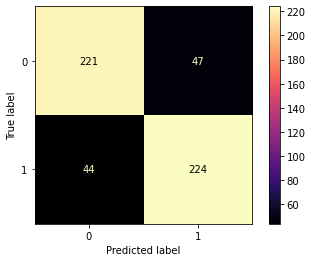

In [43]:
confusion = plot_confusion_matrix(y_true=y_test, estimator=xgboost_model, X=X_test, cmap='magma',values_format='.5g')

In [46]:
first_four_final.dtypes

Season          int64
WTeamID         int64
LTeamID         int64
Seed1           int64
Seed2           int64
Round           int64
WDivision      object
LDivision      object
ScoreT1         int32
ScoreT2         int32
Seed_diff       int64
Score_diff      int32
FGM_diff        int32
FGM%_diff     float64
FGA_diff        int32
FGM3_diff       int32
FGM3%_diff    float64
FGA3_diff       int32
FTM_diff        int32
FTM%_diff     float64
FTA_diff        int32
OR_diff         int32
DR_diff         int32
Ast_diff        int32
TO_diff         int32
Stl_diff        int32
Blk_diff        int32
PF_diff         int32
dtype: object

In [82]:
first_four_final_clean = first_four_final.drop(['Season', 'WTeamID', 'LTeamID',
                                                    'LDivision','WDivision'], axis=1)
first_four_pred = xgboost_model.predict_proba(first_four_final_clean,)
print(first_four_pred[:,1])

[0.9608691  0.98824394 0.7587117  0.38089088]


In [84]:
first_round = pd.read_csv("FirstRound.csv")
print(first_round)

    Season  DayNum            WTeamName                  LTeamName  Round
0     2021     136              Gonzaga              Norfolk State      6
1     2021     136             Oklahoma                   Missouri      6
2     2021     136            Creighton           UC-Santa Barbara      6
3     2021     136             Virginia                       Ohio      6
4     2021     136  Southern California              Wichita State      6
5     2021     136               Kansas         Eastern Washington      6
6     2021     136               Oregon      Virginia Commonwealth      6
7     2021     136                 Iowa               Grand Canyon      6
8     2021     137               Baylor                   Hartford      6
9     2021     137       North Carolina                  Wisconsin      6
10    2021     137            Villanova                   Winthrop      6
11    2021     137               Purdue                North Texas      6
12    2021     137           Texas Tec

In [85]:
first_round_totals = pd.merge(first_round,total_seeds, left_on='WTeamName',right_on='TeamName',how='left')
first_round_totals = first_round_totals.drop(columns=['TeamName'])
print(first_round_totals)

    Season  DayNum            WTeamName                  LTeamName  Round  \
0     2021     136              Gonzaga              Norfolk State      6   
1     2021     136             Oklahoma                   Missouri      6   
2     2021     136            Creighton           UC-Santa Barbara      6   
3     2021     136             Virginia                       Ohio      6   
4     2021     136  Southern California              Wichita State      6   
5     2021     136               Kansas         Eastern Washington      6   
6     2021     136               Oregon      Virginia Commonwealth      6   
7     2021     136                 Iowa               Grand Canyon      6   
8     2021     137               Baylor                   Hartford      6   
9     2021     137       North Carolina                  Wisconsin      6   
10    2021     137            Villanova                   Winthrop      6   
11    2021     137               Purdue                North Texas      6   

In [86]:
first_round_totals[first_round_totals.isna().any(axis=1)]

,Season,DayNum,WTeamName,LTeamName,Round,Seed,Region,TeamID,PTS,FG,...,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF


In [87]:
first_round_totals = first_round_totals.rename(columns= {'FGA':'FGAT1'})
first_round_totals = first_round_totals.rename(columns= {'Seed':'Seed1','Region':'WDivision','TeamID':'WTeamID','PTS':'ScoreT1',
                                                       'FG%':'FG%T1','FG':'FGT1','3P':'3PT1','3PA':'3PAT1',
                                                       '3P%':'3P%T1','FT':'FTT1','FTA':'FTAT1','FT%':'FT%T1','ORB':'ORBT1',
                                                       'TRB':'TRBT1','AST':'ASTT1','STL':'STLT1','BLK':'BLKT1','TOV':'TOVT1', 
                                                       'PF':'PFT1'})
print(first_round_totals)

    Season  DayNum            WTeamName                  LTeamName  Round  \
0     2021     136              Gonzaga              Norfolk State      6   
1     2021     136             Oklahoma                   Missouri      6   
2     2021     136            Creighton           UC-Santa Barbara      6   
3     2021     136             Virginia                       Ohio      6   
4     2021     136  Southern California              Wichita State      6   
5     2021     136               Kansas         Eastern Washington      6   
6     2021     136               Oregon      Virginia Commonwealth      6   
7     2021     136                 Iowa               Grand Canyon      6   
8     2021     137               Baylor                   Hartford      6   
9     2021     137       North Carolina                  Wisconsin      6   
10    2021     137            Villanova                   Winthrop      6   
11    2021     137               Purdue                North Texas      6   

In [88]:
first_round_totals = pd.merge(first_round_totals,total_seeds, left_on='LTeamName',right_on='TeamName',how='left')
first_round_totals = first_round_totals.drop(columns=['TeamName'])
print(first_round_totals)

    Season  DayNum            WTeamName                  LTeamName  Round  \
0     2021     136              Gonzaga              Norfolk State      6   
1     2021     136             Oklahoma                   Missouri      6   
2     2021     136            Creighton           UC-Santa Barbara      6   
3     2021     136             Virginia                       Ohio      6   
4     2021     136  Southern California              Wichita State      6   
5     2021     136               Kansas         Eastern Washington      6   
6     2021     136               Oregon      Virginia Commonwealth      6   
7     2021     136                 Iowa               Grand Canyon      6   
8     2021     137               Baylor                   Hartford      6   
9     2021     137       North Carolina                  Wisconsin      6   
10    2021     137            Villanova                   Winthrop      6   
11    2021     137               Purdue                North Texas      6   

In [89]:
first_round_totals[first_round_totals.isna().any(axis=1)]

,Season,DayNum,WTeamName,LTeamName,Round,Seed1,WDivision,WTeamID,ScoreT1,FGT1,...,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF


In [90]:
first_round_totals = first_round_totals.rename(columns={'FGA':'FGAT2'})
first_round_totals = first_round_totals.rename(columns= {'Seed':'Seed2','Region':'LDivision','TeamID':'LTeamID','PTS':'ScoreT2',
                                                       'FG':'FGT2','FG%':'FG%T2','3P':'3PT2','3PA':'3PAT2',
                                                       '3P%':'3P%T2','FT':'FTT2','FTA':'FTAT2','FT%':'FT%T2','ORB':'ORBT2',
                                                       'TRB':'TRBT2','AST':'ASTT2','STL':'STLT2','BLK':'BLKT2','TOV':'TOVT2', 
                                                       'PF':'PFT2'})
print(first_round_totals)

    Season  DayNum            WTeamName                  LTeamName  Round  \
0     2021     136              Gonzaga              Norfolk State      6   
1     2021     136             Oklahoma                   Missouri      6   
2     2021     136            Creighton           UC-Santa Barbara      6   
3     2021     136             Virginia                       Ohio      6   
4     2021     136  Southern California              Wichita State      6   
5     2021     136               Kansas         Eastern Washington      6   
6     2021     136               Oregon      Virginia Commonwealth      6   
7     2021     136                 Iowa               Grand Canyon      6   
8     2021     137               Baylor                   Hartford      6   
9     2021     137       North Carolina                  Wisconsin      6   
10    2021     137            Villanova                   Winthrop      6   
11    2021     137               Purdue                North Texas      6   

In [91]:
first_round_totals['ScoreT1']=first_round_totals['ScoreT1'].astype(str).astype(int)
first_round_totals['ScoreT2']=first_round_totals['ScoreT2'].astype(str).astype(int)
first_round_totals['FGT1']=first_round_totals['FGT1'].astype(str).astype(int)
first_round_totals['FGT2']=first_round_totals['FGT2'].astype(str).astype(int)
first_round_totals['FGAT1']=first_round_totals['FGAT1'].astype(str).astype(int)
first_round_totals['FGAT2']=first_round_totals['FGAT2'].astype(str).astype(int)
first_round_totals['3PT1']=first_round_totals['3PT1'].astype(str).astype(int)
first_round_totals['3PT2']=first_round_totals['3PT2'].astype(str).astype(int)
first_round_totals['3PAT1']=first_round_totals['3PAT1'].astype(str).astype(int)
first_round_totals['3PAT2']=first_round_totals['3PAT2'].astype(str).astype(int)
first_round_totals['FTT1']=first_round_totals['FTT1'].astype(str).astype(int)
first_round_totals['FTT2']=first_round_totals['FTT2'].astype(str).astype(int)
first_round_totals['FTAT1']=first_round_totals['FTAT1'].astype(str).astype(int)
first_round_totals['FTAT2']=first_round_totals['FTAT2'].astype(str).astype(int)
first_round_totals['ORBT1']=first_round_totals['ORBT1'].astype(str).astype(int)
first_round_totals['ORBT2']=first_round_totals['ORBT2'].astype(str).astype(int)
first_round_totals['TRBT1']=first_round_totals['TRBT1'].astype(str).astype(int)
first_round_totals['TRBT2']=first_round_totals['TRBT2'].astype(str).astype(int)
first_round_totals['ASTT1']=first_round_totals['ASTT1'].astype(str).astype(int)
first_round_totals['ASTT2']=first_round_totals['ASTT2'].astype(str).astype(int)
first_round_totals['TOVT1']=first_round_totals['TOVT1'].astype(str).astype(int)
first_round_totals['TOVT2']=first_round_totals['TOVT2'].astype(str).astype(int)
first_round_totals['STLT1']=first_round_totals['STLT1'].astype(str).astype(int)
first_round_totals['STLT2']=first_round_totals['STLT2'].astype(str).astype(int)
first_round_totals['BLKT1']=first_round_totals['BLKT1'].astype(str).astype(int)
first_round_totals['BLKT2']=first_round_totals['BLKT2'].astype(str).astype(int)
first_round_totals['PFT1']=first_round_totals['PFT1'].astype(str).astype(int)
first_round_totals['PFT2']=first_round_totals['PFT2'].astype(str).astype(int)
first_round_totals['FG%T1']=first_round_totals['FG%T1'].astype(str).astype(float)
first_round_totals['FG%T2']=first_round_totals['FG%T2'].astype(str).astype(float)
first_round_totals['3P%T1']=first_round_totals['3P%T1'].astype(str).astype(float)
first_round_totals['3P%T2']=first_round_totals['3P%T2'].astype(str).astype(float)
first_round_totals['FT%T1']=first_round_totals['FT%T1'].astype(str).astype(float)
first_round_totals['FT%T2']=first_round_totals['FT%T2'].astype(str).astype(float)

In [92]:
#Score and seed differentials
first_round_totals['Seed_diff'] = first_round_totals['Seed1'].sub(first_round_totals['Seed2'])
first_round_totals['Score_diff'] = first_round_totals['ScoreT1'].sub(first_round_totals['ScoreT2'])

#Shooting differentials
first_round_totals['FGM_diff'] = first_round_totals['FGT1'].sub(first_round_totals['FGT2'])
first_round_totals['FGM%_diff'] = first_round_totals['FG%T1'].sub(first_round_totals['FG%T2'])
first_round_totals['FGA_diff'] = first_round_totals['FGAT1'].sub(first_round_totals['FGAT2'])
first_round_totals['FGM3_diff'] = first_round_totals['3PT1'].sub(first_round_totals['3PT2'])
first_round_totals['FGM3%_diff'] = first_round_totals['3P%T1'].sub(first_round_totals['3P%T2'])
first_round_totals['FGA3_diff'] = first_round_totals['3PAT1'].sub(first_round_totals['3PAT2'])
first_round_totals['FTM_diff'] = first_round_totals['FTT1'].sub(first_round_totals['FTT2'])
first_round_totals['FTM%_diff'] = first_round_totals['FT%T1'].sub(first_round_totals['FT%T2'])
first_round_totals['FTA_diff'] = first_round_totals['FTAT1'].sub(first_round_totals['FTAT2'])

#Rebounding differentials
first_round_totals['OR_diff'] = first_round_totals['ORBT1'].sub(first_round_totals['ORBT2'])
first_round_totals['DR_diff'] = (first_round_totals['TRBT1']-first_round_totals['ORBT1']) - (first_round_totals['TRBT2']-first_round_totals['ORBT2'])

#Misc differentials
first_round_totals['Ast_diff'] = first_round_totals['ASTT1'] - first_round_totals['ASTT2']
first_round_totals['TO_diff'] = first_round_totals['TOVT1'] - first_round_totals['TOVT2']
first_round_totals['Stl_diff'] = first_round_totals['STLT1'] - first_round_totals['STLT2']
first_round_totals['Blk_diff'] = first_round_totals['BLKT1'] - first_round_totals['BLKT2']
first_round_totals['PF_diff'] = first_round_totals['PFT1'] - first_round_totals['PFT2']

print(first_round_totals)

    Season  DayNum            WTeamName                  LTeamName  Round  \
0     2021     136              Gonzaga              Norfolk State      6   
1     2021     136             Oklahoma                   Missouri      6   
2     2021     136            Creighton           UC-Santa Barbara      6   
3     2021     136             Virginia                       Ohio      6   
4     2021     136  Southern California              Wichita State      6   
5     2021     136               Kansas         Eastern Washington      6   
6     2021     136               Oregon      Virginia Commonwealth      6   
7     2021     136                 Iowa               Grand Canyon      6   
8     2021     137               Baylor                   Hartford      6   
9     2021     137       North Carolina                  Wisconsin      6   
10    2021     137            Villanova                   Winthrop      6   
11    2021     137               Purdue                North Texas      6   

In [93]:
first_round_final = first_round_totals[['Season','WTeamID','LTeamID','Seed1', 'Seed2', 'Round', 'WDivision','LDivision',
                                     'ScoreT1','ScoreT2','Seed_diff','Score_diff', 'FGM_diff', 'FGM%_diff', 'FGA_diff',
                                     'FGM3_diff', 'FGM3%_diff', 'FGA3_diff', 'FTM_diff', 'FTM%_diff', 'FTA_diff', 'OR_diff',
                                     'DR_diff','Ast_diff','TO_diff','Stl_diff','Blk_diff','PF_diff']]

print(first_round_final)

    Season  WTeamID  LTeamID  Seed1  Seed2  Round WDivision LDivision  \
0     2021     1211     1313      1     16      6         W         W   
1     2021     1328     1281      8      9      6         W         W   
2     2021     1166     1364      5     12      6         W         W   
3     2021     1438     1325      4     13      6         W         W   
4     2021     1425     1455      6     11      6         W         W   
5     2021     1242     1186      3     14      6         W         W   
6     2021     1332     1433      7     10      6         W         W   
7     2021     1234     1213      2     15      6         W         W   
8     2021     1124     1216      1     16      6         X         X   
9     2021     1314     1458      8      9      6         X         X   
10    2021     1437     1457      5     12      6         X         X   
11    2021     1345     1317      4     13      6         X         X   
12    2021     1403     1429      6     11      6  

In [94]:
first_round_final_clean = first_round_final.drop(['Season', 'WTeamID', 'LTeamID',
                                                    'LDivision','WDivision'], axis=1)
first_round_pred = xgboost_model.predict_proba(first_round_final_clean,)

print(first_round_pred[:,1])

[0.9861196  0.37912604 0.92540556 0.94330114 0.9886052  0.91499317
 0.4677501  0.988786   0.9642016  0.4174653  0.7489206  0.8391507
 0.46693912 0.9850531  0.34903818 0.7249881  0.9886052  0.8668616
 0.95987713 0.56260496 0.6174474  0.5359373  0.9830898  0.9630569
 0.9669962  0.9847616  0.9861244  0.9489922  0.7312739  0.69757897
 0.9736404  0.9847038 ]


In [95]:
second_round = pd.read_csv("secondRound.csv")
print(second_round)

    Season  DayNum              WTeamName        LTeamName  Round
0     2021     138                Gonzaga         Missouri      5
1     2021     138              Creighton         Virginia      5
2     2021     138    Southern California           Kansas      5
3     2021     138  Virginia Commonwealth             Iowa      5
4     2021     138                 Baylor        Wisconsin      5
5     2021     138              Villanova           Purdue      5
6     2021     138             Utah State         Arkansas      5
7     2021     138          Virginia Tech       Ohio State      5
8     2021     139               Illinois      Loyola (IL)      5
9     2021     139              Tennessee   Oklahoma State      5
10    2021     139        San Diego State    West Virginia      5
11    2021     139                Clemson          Houston      5
12    2021     139               Michigan  Louisiana State      5
13    2021     139               Colorado    Florida State      5
14    2021

In [96]:
second_round_totals = pd.merge(second_round,total_seeds, left_on='WTeamName',right_on='TeamName',how='left')
second_round_totals = second_round_totals.drop(columns=['TeamName'])
print(second_round_totals)

    Season  DayNum              WTeamName        LTeamName  Round  Seed  \
0     2021     138                Gonzaga         Missouri      5     1   
1     2021     138              Creighton         Virginia      5     5   
2     2021     138    Southern California           Kansas      5     6   
3     2021     138  Virginia Commonwealth             Iowa      5    10   
4     2021     138                 Baylor        Wisconsin      5     1   
5     2021     138              Villanova           Purdue      5     5   
6     2021     138             Utah State         Arkansas      5    11   
7     2021     138          Virginia Tech       Ohio State      5    10   
8     2021     139               Illinois      Loyola (IL)      5     1   
9     2021     139              Tennessee   Oklahoma State      5     5   
10    2021     139        San Diego State    West Virginia      5     6   
11    2021     139                Clemson          Houston      5     7   
12    2021     139       

In [97]:
second_round_totals[second_round_totals.isna().any(axis=1)]

,Season,DayNum,WTeamName,LTeamName,Round,Seed,Region,TeamID,PTS,FG,...,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF


In [98]:
second_round_totals = second_round_totals.rename(columns= {'FGA':'FGAT1'})
second_round_totals = second_round_totals.rename(columns= {'Seed':'Seed1','Region':'WDivision','TeamID':'WTeamID','PTS':'ScoreT1',
                                                       'FG%':'FG%T1','FG':'FGT1','3P':'3PT1','3PA':'3PAT1',
                                                       '3P%':'3P%T1','FT':'FTT1','FTA':'FTAT1','FT%':'FT%T1','ORB':'ORBT1',
                                                       'TRB':'TRBT1','AST':'ASTT1','STL':'STLT1','BLK':'BLKT1','TOV':'TOVT1', 
                                                       'PF':'PFT1'})
print(second_round_totals)

    Season  DayNum              WTeamName        LTeamName  Round  Seed1  \
0     2021     138                Gonzaga         Missouri      5      1   
1     2021     138              Creighton         Virginia      5      5   
2     2021     138    Southern California           Kansas      5      6   
3     2021     138  Virginia Commonwealth             Iowa      5     10   
4     2021     138                 Baylor        Wisconsin      5      1   
5     2021     138              Villanova           Purdue      5      5   
6     2021     138             Utah State         Arkansas      5     11   
7     2021     138          Virginia Tech       Ohio State      5     10   
8     2021     139               Illinois      Loyola (IL)      5      1   
9     2021     139              Tennessee   Oklahoma State      5      5   
10    2021     139        San Diego State    West Virginia      5      6   
11    2021     139                Clemson          Houston      5      7   
12    2021  

In [99]:
second_round_totals = pd.merge(second_round_totals,total_seeds, left_on='LTeamName',right_on='TeamName',how='left')
second_round_totals = second_round_totals.drop(columns=['TeamName'])
print(second_round_totals)

    Season  DayNum              WTeamName        LTeamName  Round  Seed1  \
0     2021     138                Gonzaga         Missouri      5      1   
1     2021     138              Creighton         Virginia      5      5   
2     2021     138    Southern California           Kansas      5      6   
3     2021     138  Virginia Commonwealth             Iowa      5     10   
4     2021     138                 Baylor        Wisconsin      5      1   
5     2021     138              Villanova           Purdue      5      5   
6     2021     138             Utah State         Arkansas      5     11   
7     2021     138          Virginia Tech       Ohio State      5     10   
8     2021     139               Illinois      Loyola (IL)      5      1   
9     2021     139              Tennessee   Oklahoma State      5      5   
10    2021     139        San Diego State    West Virginia      5      6   
11    2021     139                Clemson          Houston      5      7   
12    2021  

In [100]:
second_round_totals[second_round_totals.isna().any(axis=1)]

,Season,DayNum,WTeamName,LTeamName,Round,Seed1,WDivision,WTeamID,ScoreT1,FGT1,...,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF


In [101]:
second_round_totals = second_round_totals.rename(columns={'FGA':'FGAT2'})
second_round_totals = second_round_totals.rename(columns= {'Seed':'Seed2','Region':'LDivision','TeamID':'LTeamID','PTS':'ScoreT2',
                                                       'FG':'FGT2','FG%':'FG%T2','3P':'3PT2','3PA':'3PAT2',
                                                       '3P%':'3P%T2','FT':'FTT2','FTA':'FTAT2','FT%':'FT%T2','ORB':'ORBT2',
                                                       'TRB':'TRBT2','AST':'ASTT2','STL':'STLT2','BLK':'BLKT2','TOV':'TOVT2', 
                                                       'PF':'PFT2'})
print(second_round_totals)

    Season  DayNum              WTeamName        LTeamName  Round  Seed1  \
0     2021     138                Gonzaga         Missouri      5      1   
1     2021     138              Creighton         Virginia      5      5   
2     2021     138    Southern California           Kansas      5      6   
3     2021     138  Virginia Commonwealth             Iowa      5     10   
4     2021     138                 Baylor        Wisconsin      5      1   
5     2021     138              Villanova           Purdue      5      5   
6     2021     138             Utah State         Arkansas      5     11   
7     2021     138          Virginia Tech       Ohio State      5     10   
8     2021     139               Illinois      Loyola (IL)      5      1   
9     2021     139              Tennessee   Oklahoma State      5      5   
10    2021     139        San Diego State    West Virginia      5      6   
11    2021     139                Clemson          Houston      5      7   
12    2021  

In [102]:
second_round_totals['ScoreT1']=second_round_totals['ScoreT1'].astype(str).astype(int)
second_round_totals['ScoreT2']=second_round_totals['ScoreT2'].astype(str).astype(int)
second_round_totals['FGT1']=second_round_totals['FGT1'].astype(str).astype(int)
second_round_totals['FGT2']=second_round_totals['FGT2'].astype(str).astype(int)
second_round_totals['FGAT1']=second_round_totals['FGAT1'].astype(str).astype(int)
second_round_totals['FGAT2']=second_round_totals['FGAT2'].astype(str).astype(int)
second_round_totals['3PT1']=second_round_totals['3PT1'].astype(str).astype(int)
second_round_totals['3PT2']=second_round_totals['3PT2'].astype(str).astype(int)
second_round_totals['3PAT1']=second_round_totals['3PAT1'].astype(str).astype(int)
second_round_totals['3PAT2']=second_round_totals['3PAT2'].astype(str).astype(int)
second_round_totals['FTT1']=second_round_totals['FTT1'].astype(str).astype(int)
second_round_totals['FTT2']=second_round_totals['FTT2'].astype(str).astype(int)
second_round_totals['FTAT1']=second_round_totals['FTAT1'].astype(str).astype(int)
second_round_totals['FTAT2']=second_round_totals['FTAT2'].astype(str).astype(int)
second_round_totals['ORBT1']=second_round_totals['ORBT1'].astype(str).astype(int)
second_round_totals['ORBT2']=second_round_totals['ORBT2'].astype(str).astype(int)
second_round_totals['TRBT1']=second_round_totals['TRBT1'].astype(str).astype(int)
second_round_totals['TRBT2']=second_round_totals['TRBT2'].astype(str).astype(int)
second_round_totals['ASTT1']=second_round_totals['ASTT1'].astype(str).astype(int)
second_round_totals['ASTT2']=second_round_totals['ASTT2'].astype(str).astype(int)
second_round_totals['TOVT1']=second_round_totals['TOVT1'].astype(str).astype(int)
second_round_totals['TOVT2']=second_round_totals['TOVT2'].astype(str).astype(int)
second_round_totals['STLT1']=second_round_totals['STLT1'].astype(str).astype(int)
second_round_totals['STLT2']=second_round_totals['STLT2'].astype(str).astype(int)
second_round_totals['BLKT1']=second_round_totals['BLKT1'].astype(str).astype(int)
second_round_totals['BLKT2']=second_round_totals['BLKT2'].astype(str).astype(int)
second_round_totals['PFT1']=second_round_totals['PFT1'].astype(str).astype(int)
second_round_totals['PFT2']=second_round_totals['PFT2'].astype(str).astype(int)
second_round_totals['FG%T1']=second_round_totals['FG%T1'].astype(str).astype(float)
second_round_totals['FG%T2']=second_round_totals['FG%T2'].astype(str).astype(float)
second_round_totals['3P%T1']=second_round_totals['3P%T1'].astype(str).astype(float)
second_round_totals['3P%T2']=second_round_totals['3P%T2'].astype(str).astype(float)
second_round_totals['FT%T1']=second_round_totals['FT%T1'].astype(str).astype(float)
second_round_totals['FT%T2']=second_round_totals['FT%T2'].astype(str).astype(float)

In [103]:
#Score and seed differentials
second_round_totals['Seed_diff'] = second_round_totals['Seed1'].sub(second_round_totals['Seed2'])
second_round_totals['Score_diff'] = second_round_totals['ScoreT1'].sub(second_round_totals['ScoreT2'])

#Shooting differentials
second_round_totals['FGM_diff'] = second_round_totals['FGT1'].sub(second_round_totals['FGT2'])
second_round_totals['FGM%_diff'] = second_round_totals['FG%T1'].sub(second_round_totals['FG%T2'])
second_round_totals['FGA_diff'] = second_round_totals['FGAT1'].sub(second_round_totals['FGAT2'])
second_round_totals['FGM3_diff'] = second_round_totals['3PT1'].sub(second_round_totals['3PT2'])
second_round_totals['FGM3%_diff'] = second_round_totals['3P%T1'].sub(second_round_totals['3P%T2'])
second_round_totals['FGA3_diff'] = second_round_totals['3PAT1'].sub(second_round_totals['3PAT2'])
second_round_totals['FTM_diff'] = second_round_totals['FTT1'].sub(second_round_totals['FTT2'])
second_round_totals['FTM%_diff'] = second_round_totals['FT%T1'].sub(second_round_totals['FT%T2'])
second_round_totals['FTA_diff'] = second_round_totals['FTAT1'].sub(second_round_totals['FTAT2'])

#Rebounding differentials
second_round_totals['OR_diff'] = second_round_totals['ORBT1'].sub(second_round_totals['ORBT2'])
second_round_totals['DR_diff'] = (second_round_totals['TRBT1']-second_round_totals['ORBT1']) - (second_round_totals['TRBT2']-second_round_totals['ORBT2'])

#Misc differentials
second_round_totals['Ast_diff'] = second_round_totals['ASTT1'] - second_round_totals['ASTT2']
second_round_totals['TO_diff'] = second_round_totals['TOVT1'] - second_round_totals['TOVT2']
second_round_totals['Stl_diff'] = second_round_totals['STLT1'] - second_round_totals['STLT2']
second_round_totals['Blk_diff'] = second_round_totals['BLKT1'] - second_round_totals['BLKT2']
second_round_totals['PF_diff'] = second_round_totals['PFT1'] - second_round_totals['PFT2']

print(second_round_totals)

    Season  DayNum              WTeamName        LTeamName  Round  Seed1  \
0     2021     138                Gonzaga         Missouri      5      1   
1     2021     138              Creighton         Virginia      5      5   
2     2021     138    Southern California           Kansas      5      6   
3     2021     138  Virginia Commonwealth             Iowa      5     10   
4     2021     138                 Baylor        Wisconsin      5      1   
5     2021     138              Villanova           Purdue      5      5   
6     2021     138             Utah State         Arkansas      5     11   
7     2021     138          Virginia Tech       Ohio State      5     10   
8     2021     139               Illinois      Loyola (IL)      5      1   
9     2021     139              Tennessee   Oklahoma State      5      5   
10    2021     139        San Diego State    West Virginia      5      6   
11    2021     139                Clemson          Houston      5      7   
12    2021  

In [104]:
second_round_final = second_round_totals[['Season','WTeamID','LTeamID','Seed1', 'Seed2', 'Round', 'WDivision','LDivision',
                                     'ScoreT1','ScoreT2','Seed_diff','Score_diff', 'FGM_diff', 'FGM%_diff', 'FGA_diff',
                                     'FGM3_diff', 'FGM3%_diff', 'FGA3_diff', 'FTM_diff', 'FTM%_diff', 'FTA_diff', 'OR_diff',
                                     'DR_diff','Ast_diff','TO_diff','Stl_diff','Blk_diff','PF_diff']]

print(second_round_final)

    Season  WTeamID  LTeamID  Seed1  Seed2  Round WDivision LDivision  \
0     2021     1211     1281      1      9      5         W         W   
1     2021     1166     1438      5      4      5         W         W   
2     2021     1425     1242      6      3      5         W         W   
3     2021     1433     1234     10      2      5         W         W   
4     2021     1124     1458      1      9      5         X         X   
5     2021     1437     1345      5      4      5         X         X   
6     2021     1429     1116     11      3      5         X         X   
7     2021     1439     1326     10      2      5         X         X   
8     2021     1228     1260      1      8      5         Y         Y   
9     2021     1397     1329      5      4      5         Y         Y   
10    2021     1361     1452      6      3      5         Y         Y   
11    2021     1155     1222      7      2      5         Y         Y   
12    2021     1276     1261      1      8      5  

In [105]:
second_round_final_clean = second_round_final.drop(['Season', 'WTeamID', 'LTeamID',
                                                    'LDivision','WDivision'], axis=1)
second_round_pred = xgboost_model.predict_proba(second_round_final_clean,)

print(second_round_pred[:,1])

[0.9942941  0.9752959  0.31166804 0.96902174 0.57620126 0.7622914
 0.950524   0.97167724 0.72429365 0.9748594  0.6949275  0.98145205
 0.9816281  0.9772016  0.24866737 0.9730968 ]


In [107]:
third_round = pd.read_csv("ThirdRound.csv")
print(third_round)

   Season  DayNum        WTeamName              LTeamName  Round
0    2021     140          Gonzaga              Creighton      4
1    2021     141           Kansas  Virginia Commonwealth      4
2    2021     142           Baylor              Villanova      4
3    2021     143       Utah State          Virginia Tech      4
4    2021     144         Illinois              Tennessee      4
5    2021     145  San Diego State                Clemson      4
6    2021     146         Michigan               Colorado      4
7    2021     147            Texas            Connecticut      4


In [108]:
third_round_totals = pd.merge(third_round,total_seeds, left_on='WTeamName',right_on='TeamName',how='left')
third_round_totals = third_round_totals.drop(columns=['TeamName'])
print(third_round_totals)

   Season  DayNum        WTeamName              LTeamName  Round  Seed Region  \
0    2021     140          Gonzaga              Creighton      4     1      W   
1    2021     141           Kansas  Virginia Commonwealth      4     3      W   
2    2021     142           Baylor              Villanova      4     1      X   
3    2021     143       Utah State          Virginia Tech      4    11      X   
4    2021     144         Illinois              Tennessee      4     1      Y   
5    2021     145  San Diego State                Clemson      4     6      Y   
6    2021     146         Michigan               Colorado      4     1      Z   
7    2021     147            Texas            Connecticut      4     3      Z   

   TeamID   PTS   FG  ...   FT  FTA   FT%  ORB   TRB  AST  STL  BLK  TOV   PF  
0    1211  2395  888  ...  429  590  .727  249   986  476  216   74  315  433  
1    1242  2047  737  ...  364  511  .712  316  1064  383  192  114  346  427  
2    1124  2025  746  ...  285

In [109]:
third_round_totals = third_round_totals.rename(columns= {'FGA':'FGAT1'})
third_round_totals = third_round_totals.rename(columns= {'Seed':'Seed1','Region':'WDivision','TeamID':'WTeamID','PTS':'ScoreT1',
                                                       'FG%':'FG%T1','FG':'FGT1','3P':'3PT1','3PA':'3PAT1',
                                                       '3P%':'3P%T1','FT':'FTT1','FTA':'FTAT1','FT%':'FT%T1','ORB':'ORBT1',
                                                       'TRB':'TRBT1','AST':'ASTT1','STL':'STLT1','BLK':'BLKT1','TOV':'TOVT1', 
                                                       'PF':'PFT1'})
print(third_round_totals)

   Season  DayNum        WTeamName              LTeamName  Round  Seed1  \
0    2021     140          Gonzaga              Creighton      4      1   
1    2021     141           Kansas  Virginia Commonwealth      4      3   
2    2021     142           Baylor              Villanova      4      1   
3    2021     143       Utah State          Virginia Tech      4     11   
4    2021     144         Illinois              Tennessee      4      1   
5    2021     145  San Diego State                Clemson      4      6   
6    2021     146         Michigan               Colorado      4      1   
7    2021     147            Texas            Connecticut      4      3   

  WDivision  WTeamID ScoreT1 FGT1  ... FTT1 FTAT1 FT%T1 ORBT1 TRBT1 ASTT1  \
0         W     1211    2395  888  ...  429   590  .727   249   986   476   
1         W     1242    2047  737  ...  364   511  .712   316  1064   383   
2         X     1124    2025  746  ...  285   409  .697   309   875   409   
3         X     

In [110]:
third_round_totals = pd.merge(third_round_totals,total_seeds, left_on='LTeamName',right_on='TeamName',how='left')
third_round_totals = third_round_totals.drop(columns=['TeamName'])
print(third_round_totals)

   Season  DayNum        WTeamName              LTeamName  Round  Seed1  \
0    2021     140          Gonzaga              Creighton      4      1   
1    2021     141           Kansas  Virginia Commonwealth      4      3   
2    2021     142           Baylor              Villanova      4      1   
3    2021     143       Utah State          Virginia Tech      4     11   
4    2021     144         Illinois              Tennessee      4      1   
5    2021     145  San Diego State                Clemson      4      6   
6    2021     146         Michigan               Colorado      4      1   
7    2021     147            Texas            Connecticut      4      3   

  WDivision  WTeamID ScoreT1 FGT1  ...   FT  FTA   FT%  ORB   TRB  AST  STL  \
0         W     1211    2395  888  ...  289  450  .642  237  1011  445  198   
1         W     1242    2047  737  ...  378  497  .761  238   890  347  240   
2         X     1124    2025  746  ...  297  388  .765  211   755  336  117   
3       

In [111]:
third_round_totals = third_round_totals.rename(columns={'FGA':'FGAT2'})
third_round_totals = third_round_totals.rename(columns= {'Seed':'Seed2','Region':'LDivision','TeamID':'LTeamID','PTS':'ScoreT2',
                                                       'FG':'FGT2','FG%':'FG%T2','3P':'3PT2','3PA':'3PAT2',
                                                       '3P%':'3P%T2','FT':'FTT2','FTA':'FTAT2','FT%':'FT%T2','ORB':'ORBT2',
                                                       'TRB':'TRBT2','AST':'ASTT2','STL':'STLT2','BLK':'BLKT2','TOV':'TOVT2', 
                                                       'PF':'PFT2'})
print(third_round_totals)

   Season  DayNum        WTeamName              LTeamName  Round  Seed1  \
0    2021     140          Gonzaga              Creighton      4      1   
1    2021     141           Kansas  Virginia Commonwealth      4      3   
2    2021     142           Baylor              Villanova      4      1   
3    2021     143       Utah State          Virginia Tech      4     11   
4    2021     144         Illinois              Tennessee      4      1   
5    2021     145  San Diego State                Clemson      4      6   
6    2021     146         Michigan               Colorado      4      1   
7    2021     147            Texas            Connecticut      4      3   

  WDivision  WTeamID ScoreT1 FGT1  ... FTT2 FTAT2 FT%T2 ORBT2 TRBT2 ASTT2  \
0         W     1211    2395  888  ...  289   450  .642   237  1011   445   
1         W     1242    2047  737  ...  378   497  .761   238   890   347   
2         X     1124    2025  746  ...  297   388  .765   211   755   336   
3         X     

In [112]:
third_round_totals['ScoreT1']=third_round_totals['ScoreT1'].astype(str).astype(int)
third_round_totals['ScoreT2']=third_round_totals['ScoreT2'].astype(str).astype(int)
third_round_totals['FGT1']=third_round_totals['FGT1'].astype(str).astype(int)
third_round_totals['FGT2']=third_round_totals['FGT2'].astype(str).astype(int)
third_round_totals['FGAT1']=third_round_totals['FGAT1'].astype(str).astype(int)
third_round_totals['FGAT2']=third_round_totals['FGAT2'].astype(str).astype(int)
third_round_totals['3PT1']=third_round_totals['3PT1'].astype(str).astype(int)
third_round_totals['3PT2']=third_round_totals['3PT2'].astype(str).astype(int)
third_round_totals['3PAT1']=third_round_totals['3PAT1'].astype(str).astype(int)
third_round_totals['3PAT2']=third_round_totals['3PAT2'].astype(str).astype(int)
third_round_totals['FTT1']=third_round_totals['FTT1'].astype(str).astype(int)
third_round_totals['FTT2']=third_round_totals['FTT2'].astype(str).astype(int)
third_round_totals['FTAT1']=third_round_totals['FTAT1'].astype(str).astype(int)
third_round_totals['FTAT2']=third_round_totals['FTAT2'].astype(str).astype(int)
third_round_totals['ORBT1']=third_round_totals['ORBT1'].astype(str).astype(int)
third_round_totals['ORBT2']=third_round_totals['ORBT2'].astype(str).astype(int)
third_round_totals['TRBT1']=third_round_totals['TRBT1'].astype(str).astype(int)
third_round_totals['TRBT2']=third_round_totals['TRBT2'].astype(str).astype(int)
third_round_totals['ASTT1']=third_round_totals['ASTT1'].astype(str).astype(int)
third_round_totals['ASTT2']=third_round_totals['ASTT2'].astype(str).astype(int)
third_round_totals['TOVT1']=third_round_totals['TOVT1'].astype(str).astype(int)
third_round_totals['TOVT2']=third_round_totals['TOVT2'].astype(str).astype(int)
third_round_totals['STLT1']=third_round_totals['STLT1'].astype(str).astype(int)
third_round_totals['STLT2']=third_round_totals['STLT2'].astype(str).astype(int)
third_round_totals['BLKT1']=third_round_totals['BLKT1'].astype(str).astype(int)
third_round_totals['BLKT2']=third_round_totals['BLKT2'].astype(str).astype(int)
third_round_totals['PFT1']=third_round_totals['PFT1'].astype(str).astype(int)
third_round_totals['PFT2']=third_round_totals['PFT2'].astype(str).astype(int)
third_round_totals['FG%T1']=third_round_totals['FG%T1'].astype(str).astype(float)
third_round_totals['FG%T2']=third_round_totals['FG%T2'].astype(str).astype(float)
third_round_totals['3P%T1']=third_round_totals['3P%T1'].astype(str).astype(float)
third_round_totals['3P%T2']=third_round_totals['3P%T2'].astype(str).astype(float)
third_round_totals['FT%T1']=third_round_totals['FT%T1'].astype(str).astype(float)
third_round_totals['FT%T2']=third_round_totals['FT%T2'].astype(str).astype(float)

In [113]:
#Score and seed differentials
third_round_totals['Seed_diff'] = third_round_totals['Seed1'].sub(third_round_totals['Seed2'])
third_round_totals['Score_diff'] = third_round_totals['ScoreT1'].sub(third_round_totals['ScoreT2'])

#Shooting differentials
third_round_totals['FGM_diff'] = third_round_totals['FGT1'].sub(third_round_totals['FGT2'])
third_round_totals['FGM%_diff'] = third_round_totals['FG%T1'].sub(third_round_totals['FG%T2'])
third_round_totals['FGA_diff'] = third_round_totals['FGAT1'].sub(third_round_totals['FGAT2'])
third_round_totals['FGM3_diff'] = third_round_totals['3PT1'].sub(third_round_totals['3PT2'])
third_round_totals['FGM3%_diff'] = third_round_totals['3P%T1'].sub(third_round_totals['3P%T2'])
third_round_totals['FGA3_diff'] = third_round_totals['3PAT1'].sub(third_round_totals['3PAT2'])
third_round_totals['FTM_diff'] = third_round_totals['FTT1'].sub(third_round_totals['FTT2'])
third_round_totals['FTM%_diff'] = third_round_totals['FT%T1'].sub(third_round_totals['FT%T2'])
third_round_totals['FTA_diff'] = third_round_totals['FTAT1'].sub(third_round_totals['FTAT2'])

#Rebounding differentials
third_round_totals['OR_diff'] = third_round_totals['ORBT1'].sub(third_round_totals['ORBT2'])
third_round_totals['DR_diff'] = (third_round_totals['TRBT1']-third_round_totals['ORBT1']) - (third_round_totals['TRBT2']-third_round_totals['ORBT2'])

#Misc differentials
third_round_totals['Ast_diff'] = third_round_totals['ASTT1'] - third_round_totals['ASTT2']
third_round_totals['TO_diff'] = third_round_totals['TOVT1'] - third_round_totals['TOVT2']
third_round_totals['Stl_diff'] = third_round_totals['STLT1'] - third_round_totals['STLT2']
third_round_totals['Blk_diff'] = third_round_totals['BLKT1'] - third_round_totals['BLKT2']
third_round_totals['PF_diff'] = third_round_totals['PFT1'] - third_round_totals['PFT2']

print(third_round_totals)

   Season  DayNum        WTeamName              LTeamName  Round  Seed1  \
0    2021     140          Gonzaga              Creighton      4      1   
1    2021     141           Kansas  Virginia Commonwealth      4      3   
2    2021     142           Baylor              Villanova      4      1   
3    2021     143       Utah State          Virginia Tech      4     11   
4    2021     144         Illinois              Tennessee      4      1   
5    2021     145  San Diego State                Clemson      4      6   
6    2021     146         Michigan               Colorado      4      1   
7    2021     147            Texas            Connecticut      4      3   

  WDivision  WTeamID  ScoreT1  FGT1  ...  FTM_diff  FTM%_diff  FTA_diff  \
0         W     1211     2395   888  ...       140      0.085       140   
1         W     1242     2047   737  ...       -14     -0.049        14   
2         X     1124     2025   746  ...       -12     -0.068        21   
3         X     1429    

In [114]:
third_round_final = third_round_totals[['Season','WTeamID','LTeamID','Seed1', 'Seed2', 'Round', 'WDivision','LDivision',
                                     'ScoreT1','ScoreT2','Seed_diff','Score_diff', 'FGM_diff', 'FGM%_diff', 'FGA_diff',
                                     'FGM3_diff', 'FGM3%_diff', 'FGA3_diff', 'FTM_diff', 'FTM%_diff', 'FTA_diff', 'OR_diff',
                                     'DR_diff','Ast_diff','TO_diff','Stl_diff','Blk_diff','PF_diff']]

print(third_round_final)

   Season  WTeamID  LTeamID  Seed1  Seed2  Round WDivision LDivision  ScoreT1  \
0    2021     1211     1166      1      5      4         W         W     2395   
1    2021     1242     1433      3     10      4         W         W     2047   
2    2021     1124     1437      1      5      4         X         X     2025   
3    2021     1429     1439     11     10      4         X         X     2052   
4    2021     1228     1397      1      5      4         Y         Y     2361   
5    2021     1361     1155      6      7      4         Y         Y     2000   
6    2021     1276     1160      1      5      4         Z         Z     1830   
7    2021     1400     1163      3      7      4         Z         Z     1956   

   ScoreT2  ...  FTM_diff  FTM%_diff  FTA_diff  OR_diff  DR_diff  Ast_diff  \
0     2155  ...       140      0.085       140       12      -37        31   
1     1864  ...       -14     -0.049        14       78       96        36   
2     1662  ...       -12     -0.068

In [115]:
third_round_final_clean = third_round_final.drop(['Season', 'WTeamID', 'LTeamID',
                                                    'LDivision','WDivision'], axis=1)
third_round_pred = xgboost_model.predict_proba(third_round_final_clean,)

print(third_round_pred[:,1])

[0.5794677  0.9443069  0.8273488  0.96457815 0.98784155 0.9902996
 0.97281265 0.9562578 ]


In [116]:
fourth_round = pd.read_csv("fourthRound.csv")
print(fourth_round)

   Season  DayNum WTeamName        LTeamName  Round
0    2021     142   Gonzaga           Kansas      3
1    2021     143    Baylor       Utah State      3
2    2021     142  Illinois  San Diego State      3
3    2021     143  Michigan            Texas      3


In [117]:
fourth_round_totals = pd.merge(fourth_round,total_seeds, left_on='WTeamName',right_on='TeamName',how='left')
fourth_round_totals = fourth_round_totals.drop(columns=['TeamName'])
print(fourth_round_totals)

   Season  DayNum WTeamName        LTeamName  Round  Seed Region  TeamID  \
0    2021     142   Gonzaga           Kansas      3     1      W    1211   
1    2021     143    Baylor       Utah State      3     1      X    1124   
2    2021     142  Illinois  San Diego State      3     1      Y    1228   
3    2021     143  Michigan            Texas      3     1      Z    1276   

    PTS   FG  ...   FT  FTA   FT%  ORB   TRB  AST  STL  BLK  TOV   PF  
0  2395  888  ...  429  590  .727  249   986  476  216   74  315  433  
1  2025  746  ...  285  409  .697  309   875  409  215   90  298  412  
2  2361  851  ...  462  669  .691  313  1172  473  166   82  382  520  
3  1830  668  ...  311  400  .778  219   899  371  106  103  266  353  

[4 rows x 25 columns]


In [118]:
fourth_round_totals = fourth_round_totals.rename(columns= {'FGA':'FGAT1'})
fourth_round_totals = fourth_round_totals.rename(columns= {'Seed':'Seed1','Region':'WDivision','TeamID':'WTeamID','PTS':'ScoreT1',
                                                       'FG%':'FG%T1','FG':'FGT1','3P':'3PT1','3PA':'3PAT1',
                                                       '3P%':'3P%T1','FT':'FTT1','FTA':'FTAT1','FT%':'FT%T1','ORB':'ORBT1',
                                                       'TRB':'TRBT1','AST':'ASTT1','STL':'STLT1','BLK':'BLKT1','TOV':'TOVT1', 
                                                       'PF':'PFT1'})
print(fourth_round_totals)

   Season  DayNum WTeamName        LTeamName  Round  Seed1 WDivision  WTeamID  \
0    2021     142   Gonzaga           Kansas      3      1         W     1211   
1    2021     143    Baylor       Utah State      3      1         X     1124   
2    2021     142  Illinois  San Diego State      3      1         Y     1228   
3    2021     143  Michigan            Texas      3      1         Z     1276   

  ScoreT1 FGT1  ... FTT1 FTAT1 FT%T1 ORBT1 TRBT1 ASTT1 STLT1 BLKT1 TOVT1 PFT1  
0    2395  888  ...  429   590  .727   249   986   476   216    74   315  433  
1    2025  746  ...  285   409  .697   309   875   409   215    90   298  412  
2    2361  851  ...  462   669  .691   313  1172   473   166    82   382  520  
3    1830  668  ...  311   400  .778   219   899   371   106   103   266  353  

[4 rows x 25 columns]


In [119]:
fourth_round_totals = pd.merge(fourth_round_totals,total_seeds, left_on='LTeamName',right_on='TeamName',how='left')
fourth_round_totals = fourth_round_totals.drop(columns=['TeamName'])
print(fourth_round_totals)

   Season  DayNum WTeamName        LTeamName  Round  Seed1 WDivision  WTeamID  \
0    2021     142   Gonzaga           Kansas      3      1         W     1211   
1    2021     143    Baylor       Utah State      3      1         X     1124   
2    2021     142  Illinois  San Diego State      3      1         Y     1228   
3    2021     143  Michigan            Texas      3      1         Z     1276   

  ScoreT1 FGT1  ...   FT  FTA   FT%  ORB   TRB  AST  STL  BLK  TOV   PF  
0    2395  888  ...  364  511  .712  316  1064  383  192  114  346  427  
1    2025  746  ...  369  508  .726  353  1142  456  190  136  381  423  
2    2361  851  ...  381  527  .723  262   970  374  223   77  305  501  
3    1830  668  ...  363  513  .708  286  1005  341  170  101  370  515  

[4 rows x 45 columns]


In [120]:
fourth_round_totals[fourth_round_totals.isna().any(axis=1)]

,Season,DayNum,WTeamName,LTeamName,Round,Seed1,WDivision,WTeamID,ScoreT1,FGT1,...,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF


In [121]:
fourth_round_totals = fourth_round_totals.rename(columns={'FGA':'FGAT2'})
fourth_round_totals = fourth_round_totals.rename(columns= {'Seed':'Seed2','Region':'LDivision','TeamID':'LTeamID','PTS':'ScoreT2',
                                                       'FG':'FGT2','FG%':'FG%T2','3P':'3PT2','3PA':'3PAT2',
                                                       '3P%':'3P%T2','FT':'FTT2','FTA':'FTAT2','FT%':'FT%T2','ORB':'ORBT2',
                                                       'TRB':'TRBT2','AST':'ASTT2','STL':'STLT2','BLK':'BLKT2','TOV':'TOVT2', 
                                                       'PF':'PFT2'})
print(fourth_round_totals)

   Season  DayNum WTeamName        LTeamName  Round  Seed1 WDivision  WTeamID  \
0    2021     142   Gonzaga           Kansas      3      1         W     1211   
1    2021     143    Baylor       Utah State      3      1         X     1124   
2    2021     142  Illinois  San Diego State      3      1         Y     1228   
3    2021     143  Michigan            Texas      3      1         Z     1276   

  ScoreT1 FGT1  ... FTT2 FTAT2 FT%T2 ORBT2 TRBT2 ASTT2 STLT2 BLKT2 TOVT2 PFT2  
0    2395  888  ...  364   511  .712   316  1064   383   192   114   346  427  
1    2025  746  ...  369   508  .726   353  1142   456   190   136   381  423  
2    2361  851  ...  381   527  .723   262   970   374   223    77   305  501  
3    1830  668  ...  363   513  .708   286  1005   341   170   101   370  515  

[4 rows x 45 columns]


In [122]:
fourth_round_totals['ScoreT1']=fourth_round_totals['ScoreT1'].astype(str).astype(int)
fourth_round_totals['ScoreT2']=fourth_round_totals['ScoreT2'].astype(str).astype(int)
fourth_round_totals['FGT1']=fourth_round_totals['FGT1'].astype(str).astype(int)
fourth_round_totals['FGT2']=fourth_round_totals['FGT2'].astype(str).astype(int)
fourth_round_totals['FGAT1']=fourth_round_totals['FGAT1'].astype(str).astype(int)
fourth_round_totals['FGAT2']=fourth_round_totals['FGAT2'].astype(str).astype(int)
fourth_round_totals['3PT1']=fourth_round_totals['3PT1'].astype(str).astype(int)
fourth_round_totals['3PT2']=fourth_round_totals['3PT2'].astype(str).astype(int)
fourth_round_totals['3PAT1']=fourth_round_totals['3PAT1'].astype(str).astype(int)
fourth_round_totals['3PAT2']=fourth_round_totals['3PAT2'].astype(str).astype(int)
fourth_round_totals['FTT1']=fourth_round_totals['FTT1'].astype(str).astype(int)
fourth_round_totals['FTT2']=fourth_round_totals['FTT2'].astype(str).astype(int)
fourth_round_totals['FTAT1']=fourth_round_totals['FTAT1'].astype(str).astype(int)
fourth_round_totals['FTAT2']=fourth_round_totals['FTAT2'].astype(str).astype(int)
fourth_round_totals['ORBT1']=fourth_round_totals['ORBT1'].astype(str).astype(int)
fourth_round_totals['ORBT2']=fourth_round_totals['ORBT2'].astype(str).astype(int)
fourth_round_totals['TRBT1']=fourth_round_totals['TRBT1'].astype(str).astype(int)
fourth_round_totals['TRBT2']=fourth_round_totals['TRBT2'].astype(str).astype(int)
fourth_round_totals['ASTT1']=fourth_round_totals['ASTT1'].astype(str).astype(int)
fourth_round_totals['ASTT2']=fourth_round_totals['ASTT2'].astype(str).astype(int)
fourth_round_totals['TOVT1']=fourth_round_totals['TOVT1'].astype(str).astype(int)
fourth_round_totals['TOVT2']=fourth_round_totals['TOVT2'].astype(str).astype(int)
fourth_round_totals['STLT1']=fourth_round_totals['STLT1'].astype(str).astype(int)
fourth_round_totals['STLT2']=fourth_round_totals['STLT2'].astype(str).astype(int)
fourth_round_totals['BLKT1']=fourth_round_totals['BLKT1'].astype(str).astype(int)
fourth_round_totals['BLKT2']=fourth_round_totals['BLKT2'].astype(str).astype(int)
fourth_round_totals['PFT1']=fourth_round_totals['PFT1'].astype(str).astype(int)
fourth_round_totals['PFT2']=fourth_round_totals['PFT2'].astype(str).astype(int)
fourth_round_totals['FG%T1']=fourth_round_totals['FG%T1'].astype(str).astype(float)
fourth_round_totals['FG%T2']=fourth_round_totals['FG%T2'].astype(str).astype(float)
fourth_round_totals['3P%T1']=fourth_round_totals['3P%T1'].astype(str).astype(float)
fourth_round_totals['3P%T2']=fourth_round_totals['3P%T2'].astype(str).astype(float)
fourth_round_totals['FT%T1']=fourth_round_totals['FT%T1'].astype(str).astype(float)
fourth_round_totals['FT%T2']=fourth_round_totals['FT%T2'].astype(str).astype(float)

In [123]:
#Score and seed differentials
fourth_round_totals['Seed_diff'] = fourth_round_totals['Seed1'].sub(fourth_round_totals['Seed2'])
fourth_round_totals['Score_diff'] = fourth_round_totals['ScoreT1'].sub(fourth_round_totals['ScoreT2'])

#Shooting differentials
fourth_round_totals['FGM_diff'] = fourth_round_totals['FGT1'].sub(fourth_round_totals['FGT2'])
fourth_round_totals['FGM%_diff'] = fourth_round_totals['FG%T1'].sub(fourth_round_totals['FG%T2'])
fourth_round_totals['FGA_diff'] = fourth_round_totals['FGAT1'].sub(fourth_round_totals['FGAT2'])
fourth_round_totals['FGM3_diff'] = fourth_round_totals['3PT1'].sub(fourth_round_totals['3PT2'])
fourth_round_totals['FGM3%_diff'] = fourth_round_totals['3P%T1'].sub(fourth_round_totals['3P%T2'])
fourth_round_totals['FGA3_diff'] = fourth_round_totals['3PAT1'].sub(fourth_round_totals['3PAT2'])
fourth_round_totals['FTM_diff'] = fourth_round_totals['FTT1'].sub(fourth_round_totals['FTT2'])
fourth_round_totals['FTM%_diff'] = fourth_round_totals['FT%T1'].sub(fourth_round_totals['FT%T2'])
fourth_round_totals['FTA_diff'] = fourth_round_totals['FTAT1'].sub(fourth_round_totals['FTAT2'])

#Rebounding differentials
fourth_round_totals['OR_diff'] = fourth_round_totals['ORBT1'].sub(fourth_round_totals['ORBT2'])
fourth_round_totals['DR_diff'] = (fourth_round_totals['TRBT1']-fourth_round_totals['ORBT1']) - (fourth_round_totals['TRBT2']-fourth_round_totals['ORBT2'])

#Misc differentials
fourth_round_totals['Ast_diff'] = fourth_round_totals['ASTT1'] - fourth_round_totals['ASTT2']
fourth_round_totals['TO_diff'] = fourth_round_totals['TOVT1'] - fourth_round_totals['TOVT2']
fourth_round_totals['Stl_diff'] = fourth_round_totals['STLT1'] - fourth_round_totals['STLT2']
fourth_round_totals['Blk_diff'] = fourth_round_totals['BLKT1'] - fourth_round_totals['BLKT2']
fourth_round_totals['PF_diff'] = fourth_round_totals['PFT1'] - fourth_round_totals['PFT2']

print(fourth_round_totals)

   Season  DayNum WTeamName        LTeamName  Round  Seed1 WDivision  WTeamID  \
0    2021     142   Gonzaga           Kansas      3      1         W     1211   
1    2021     143    Baylor       Utah State      3      1         X     1124   
2    2021     142  Illinois  San Diego State      3      1         Y     1228   
3    2021     143  Michigan            Texas      3      1         Z     1276   

   ScoreT1  FGT1  ...  FTM_diff  FTM%_diff  FTA_diff  OR_diff  DR_diff  \
0     2395   888  ...        65      0.015        79      -67      -11   
1     2025   746  ...       -84     -0.029       -99      -44     -223   
2     2361   851  ...        81     -0.032       142       51      151   
3     1830   668  ...       -52      0.070      -113      -67      -39   

   Ast_diff  TO_diff  Stl_diff  Blk_diff  PF_diff  
0        93      -31        24       -40        6  
1       -47      -83        25       -46      -11  
2        99       77       -57         5       19  
3        30    

In [124]:
fourth_round_final = fourth_round_totals[['Season','WTeamID','LTeamID','Seed1', 'Seed2', 'Round', 'WDivision','LDivision',
                                     'ScoreT1','ScoreT2','Seed_diff','Score_diff', 'FGM_diff', 'FGM%_diff', 'FGA_diff',
                                     'FGM3_diff', 'FGM3%_diff', 'FGA3_diff', 'FTM_diff', 'FTM%_diff', 'FTA_diff', 'OR_diff',
                                     'DR_diff','Ast_diff','TO_diff','Stl_diff','Blk_diff','PF_diff']]

print(fourth_round_final)

   Season  WTeamID  LTeamID  Seed1  Seed2  Round WDivision LDivision  ScoreT1  \
0    2021     1211     1242      1      3      3         W         W     2395   
1    2021     1124     1429      1     11      3         X         X     2025   
2    2021     1228     1361      1      6      3         Y         Y     2361   
3    2021     1276     1400      1      3      3         Z         Z     1830   

   ScoreT2  ...  FTM_diff  FTM%_diff  FTA_diff  OR_diff  DR_diff  Ast_diff  \
0     2047  ...        65      0.015        79      -67      -11        93   
1     2052  ...       -84     -0.029       -99      -44     -223       -47   
2     2000  ...        81     -0.032       142       51      151        99   
3     1956  ...       -52      0.070      -113      -67      -39        30   

   TO_diff  Stl_diff  Blk_diff  PF_diff  
0      -31        24       -40        6  
1      -83        25       -46      -11  
2       77       -57         5       19  
3     -104       -64         2     

In [125]:
fourth_round_final_clean = fourth_round_final.drop(['Season', 'WTeamID', 'LTeamID',
                                                    'LDivision','WDivision'], axis=1)
fourth_round_pred = xgboost_model.predict_proba(fourth_round_final_clean,)

print(fourth_round_pred[:,1])

[0.9825994  0.40791377 0.9788296  0.925426  ]


In [126]:
fifth_round = pd.read_csv("fifthRound.csv")
print(fifth_round)

   Season  DayNum WTeamName   LTeamName  Round
0    2021     144   Gonzaga  Utah State      2
1    2021     144  Illinois    Michigan      2


In [127]:
fifth_round_totals = pd.merge(fifth_round,total_seeds, left_on='WTeamName',right_on='TeamName',how='left')
fifth_round_totals = fifth_round_totals.drop(columns=['TeamName'])
print(fifth_round_totals)

   Season  DayNum WTeamName   LTeamName  Round  Seed Region  TeamID   PTS  \
0    2021     144   Gonzaga  Utah State      2     1      W    1211  2395   
1    2021     144  Illinois    Michigan      2     1      Y    1228  2361   

    FG  ...   FT  FTA   FT%  ORB   TRB  AST  STL BLK  TOV   PF  
0  888  ...  429  590  .727  249   986  476  216  74  315  433  
1  851  ...  462  669  .691  313  1172  473  166  82  382  520  

[2 rows x 25 columns]


In [128]:
fifth_round_totals = fifth_round_totals.rename(columns= {'FGA':'FGAT1'})
fifth_round_totals = fifth_round_totals.rename(columns= {'Seed':'Seed1','Region':'WDivision','TeamID':'WTeamID','PTS':'ScoreT1',
                                                       'FG%':'FG%T1','FG':'FGT1','3P':'3PT1','3PA':'3PAT1',
                                                       '3P%':'3P%T1','FT':'FTT1','FTA':'FTAT1','FT%':'FT%T1','ORB':'ORBT1',
                                                       'TRB':'TRBT1','AST':'ASTT1','STL':'STLT1','BLK':'BLKT1','TOV':'TOVT1', 
                                                       'PF':'PFT1'})
print(fifth_round_totals)

   Season  DayNum WTeamName   LTeamName  Round  Seed1 WDivision  WTeamID  \
0    2021     144   Gonzaga  Utah State      2      1         W     1211   
1    2021     144  Illinois    Michigan      2      1         Y     1228   

  ScoreT1 FGT1  ... FTT1 FTAT1 FT%T1 ORBT1 TRBT1 ASTT1 STLT1 BLKT1 TOVT1 PFT1  
0    2395  888  ...  429   590  .727   249   986   476   216    74   315  433  
1    2361  851  ...  462   669  .691   313  1172   473   166    82   382  520  

[2 rows x 25 columns]


In [129]:
fifth_round_totals = pd.merge(fifth_round_totals,total_seeds, left_on='LTeamName',right_on='TeamName',how='left')
fifth_round_totals = fifth_round_totals.drop(columns=['TeamName'])
print(fifth_round_totals)

   Season  DayNum WTeamName   LTeamName  Round  Seed1 WDivision  WTeamID  \
0    2021     144   Gonzaga  Utah State      2      1         W     1211   
1    2021     144  Illinois    Michigan      2      1         Y     1228   

  ScoreT1 FGT1  ...   FT  FTA   FT%  ORB   TRB  AST  STL  BLK  TOV   PF  
0    2395  888  ...  369  508  .726  353  1142  456  190  136  381  423  
1    2361  851  ...  311  400  .778  219   899  371  106  103  266  353  

[2 rows x 45 columns]


In [130]:
fifth_round_totals = fifth_round_totals.rename(columns={'FGA':'FGAT2'})
fifth_round_totals = fifth_round_totals.rename(columns= {'Seed':'Seed2','Region':'LDivision','TeamID':'LTeamID','PTS':'ScoreT2',
                                                       'FG':'FGT2','FG%':'FG%T2','3P':'3PT2','3PA':'3PAT2',
                                                       '3P%':'3P%T2','FT':'FTT2','FTA':'FTAT2','FT%':'FT%T2','ORB':'ORBT2',
                                                       'TRB':'TRBT2','AST':'ASTT2','STL':'STLT2','BLK':'BLKT2','TOV':'TOVT2', 
                                                       'PF':'PFT2'})
print(fifth_round_totals)

   Season  DayNum WTeamName   LTeamName  Round  Seed1 WDivision  WTeamID  \
0    2021     144   Gonzaga  Utah State      2      1         W     1211   
1    2021     144  Illinois    Michigan      2      1         Y     1228   

  ScoreT1 FGT1  ... FTT2 FTAT2 FT%T2 ORBT2 TRBT2 ASTT2 STLT2 BLKT2 TOVT2 PFT2  
0    2395  888  ...  369   508  .726   353  1142   456   190   136   381  423  
1    2361  851  ...  311   400  .778   219   899   371   106   103   266  353  

[2 rows x 45 columns]


In [131]:
fifth_round_totals['ScoreT1']=fifth_round_totals['ScoreT1'].astype(str).astype(int)
fifth_round_totals['ScoreT2']=fifth_round_totals['ScoreT2'].astype(str).astype(int)
fifth_round_totals['FGT1']=fifth_round_totals['FGT1'].astype(str).astype(int)
fifth_round_totals['FGT2']=fifth_round_totals['FGT2'].astype(str).astype(int)
fifth_round_totals['FGAT1']=fifth_round_totals['FGAT1'].astype(str).astype(int)
fifth_round_totals['FGAT2']=fifth_round_totals['FGAT2'].astype(str).astype(int)
fifth_round_totals['3PT1']=fifth_round_totals['3PT1'].astype(str).astype(int)
fifth_round_totals['3PT2']=fifth_round_totals['3PT2'].astype(str).astype(int)
fifth_round_totals['3PAT1']=fifth_round_totals['3PAT1'].astype(str).astype(int)
fifth_round_totals['3PAT2']=fifth_round_totals['3PAT2'].astype(str).astype(int)
fifth_round_totals['FTT1']=fifth_round_totals['FTT1'].astype(str).astype(int)
fifth_round_totals['FTT2']=fifth_round_totals['FTT2'].astype(str).astype(int)
fifth_round_totals['FTAT1']=fifth_round_totals['FTAT1'].astype(str).astype(int)
fifth_round_totals['FTAT2']=fifth_round_totals['FTAT2'].astype(str).astype(int)
fifth_round_totals['ORBT1']=fifth_round_totals['ORBT1'].astype(str).astype(int)
fifth_round_totals['ORBT2']=fifth_round_totals['ORBT2'].astype(str).astype(int)
fifth_round_totals['TRBT1']=fifth_round_totals['TRBT1'].astype(str).astype(int)
fifth_round_totals['TRBT2']=fifth_round_totals['TRBT2'].astype(str).astype(int)
fifth_round_totals['ASTT1']=fifth_round_totals['ASTT1'].astype(str).astype(int)
fifth_round_totals['ASTT2']=fifth_round_totals['ASTT2'].astype(str).astype(int)
fifth_round_totals['TOVT1']=fifth_round_totals['TOVT1'].astype(str).astype(int)
fifth_round_totals['TOVT2']=fifth_round_totals['TOVT2'].astype(str).astype(int)
fifth_round_totals['STLT1']=fifth_round_totals['STLT1'].astype(str).astype(int)
fifth_round_totals['STLT2']=fifth_round_totals['STLT2'].astype(str).astype(int)
fifth_round_totals['BLKT1']=fifth_round_totals['BLKT1'].astype(str).astype(int)
fifth_round_totals['BLKT2']=fifth_round_totals['BLKT2'].astype(str).astype(int)
fifth_round_totals['PFT1']=fifth_round_totals['PFT1'].astype(str).astype(int)
fifth_round_totals['PFT2']=fifth_round_totals['PFT2'].astype(str).astype(int)
fifth_round_totals['FG%T1']=fifth_round_totals['FG%T1'].astype(str).astype(float)
fifth_round_totals['FG%T2']=fifth_round_totals['FG%T2'].astype(str).astype(float)
fifth_round_totals['3P%T1']=fifth_round_totals['3P%T1'].astype(str).astype(float)
fifth_round_totals['3P%T2']=fifth_round_totals['3P%T2'].astype(str).astype(float)
fifth_round_totals['FT%T1']=fifth_round_totals['FT%T1'].astype(str).astype(float)
fifth_round_totals['FT%T2']=fifth_round_totals['FT%T2'].astype(str).astype(float)

In [132]:
#Score and seed differentials
fifth_round_totals['Seed_diff'] = fifth_round_totals['Seed1'].sub(fifth_round_totals['Seed2'])
fifth_round_totals['Score_diff'] = fifth_round_totals['ScoreT1'].sub(fifth_round_totals['ScoreT2'])

#Shooting differentials
fifth_round_totals['FGM_diff'] = fifth_round_totals['FGT1'].sub(fifth_round_totals['FGT2'])
fifth_round_totals['FGM%_diff'] = fifth_round_totals['FG%T1'].sub(fifth_round_totals['FG%T2'])
fifth_round_totals['FGA_diff'] = fifth_round_totals['FGAT1'].sub(fifth_round_totals['FGAT2'])
fifth_round_totals['FGM3_diff'] = fifth_round_totals['3PT1'].sub(fifth_round_totals['3PT2'])
fifth_round_totals['FGM3%_diff'] = fifth_round_totals['3P%T1'].sub(fifth_round_totals['3P%T2'])
fifth_round_totals['FGA3_diff'] = fifth_round_totals['3PAT1'].sub(fifth_round_totals['3PAT2'])
fifth_round_totals['FTM_diff'] = fifth_round_totals['FTT1'].sub(fifth_round_totals['FTT2'])
fifth_round_totals['FTM%_diff'] = fifth_round_totals['FT%T1'].sub(fifth_round_totals['FT%T2'])
fifth_round_totals['FTA_diff'] = fifth_round_totals['FTAT1'].sub(fifth_round_totals['FTAT2'])

#Rebounding differentials
fifth_round_totals['OR_diff'] = fifth_round_totals['ORBT1'].sub(fifth_round_totals['ORBT2'])
fifth_round_totals['DR_diff'] = (fifth_round_totals['TRBT1']-fifth_round_totals['ORBT1']) - (fifth_round_totals['TRBT2']-fifth_round_totals['ORBT2'])

#Misc differentials
fifth_round_totals['Ast_diff'] = fifth_round_totals['ASTT1'] - fifth_round_totals['ASTT2']
fifth_round_totals['TO_diff'] = fifth_round_totals['TOVT1'] - fifth_round_totals['TOVT2']
fifth_round_totals['Stl_diff'] = fifth_round_totals['STLT1'] - fifth_round_totals['STLT2']
fifth_round_totals['Blk_diff'] = fifth_round_totals['BLKT1'] - fifth_round_totals['BLKT2']
fifth_round_totals['PF_diff'] = fifth_round_totals['PFT1'] - fifth_round_totals['PFT2']

print(fifth_round_totals)

   Season  DayNum WTeamName   LTeamName  Round  Seed1 WDivision  WTeamID  \
0    2021     144   Gonzaga  Utah State      2      1         W     1211   
1    2021     144  Illinois    Michigan      2      1         Y     1228   

   ScoreT1  FGT1  ...  FTM_diff  FTM%_diff  FTA_diff  OR_diff  DR_diff  \
0     2395   888  ...        60      0.001        82     -104      -52   
1     2361   851  ...       151     -0.087       269       94      179   

   Ast_diff  TO_diff  Stl_diff  Blk_diff  PF_diff  
0        20      -66        26       -62       10  
1       102      116        60       -21      167  

[2 rows x 63 columns]


In [133]:
fifth_round_final = fifth_round_totals[['Season','WTeamID','LTeamID','Seed1', 'Seed2', 'Round', 'WDivision','LDivision',
                                     'ScoreT1','ScoreT2','Seed_diff','Score_diff', 'FGM_diff', 'FGM%_diff', 'FGA_diff',
                                     'FGM3_diff', 'FGM3%_diff', 'FGA3_diff', 'FTM_diff', 'FTM%_diff', 'FTA_diff', 'OR_diff',
                                     'DR_diff','Ast_diff','TO_diff','Stl_diff','Blk_diff','PF_diff']]

print(fifth_round_final)

   Season  WTeamID  LTeamID  Seed1  Seed2  Round WDivision LDivision  ScoreT1  \
0    2021     1211     1429      1     11      2         W         X     2395   
1    2021     1228     1276      1      1      2         Y         Z     2361   

   ScoreT2  ...  FTM_diff  FTM%_diff  FTA_diff  OR_diff  DR_diff  Ast_diff  \
0     2052  ...        60      0.001        82     -104      -52        20   
1     1830  ...       151     -0.087       269       94      179       102   

   TO_diff  Stl_diff  Blk_diff  PF_diff  
0      -66        26       -62       10  
1      116        60       -21      167  

[2 rows x 28 columns]


In [134]:
fifth_round_final_clean = fifth_round_final.drop(['Season', 'WTeamID', 'LTeamID',
                                                    'LDivision','WDivision'], axis=1)
fifth_round_pred = xgboost_model.predict_proba(fifth_round_final_clean,)

print(fifth_round_pred[:,1])

[0.49331602 0.9555274 ]
